-----------------------------------


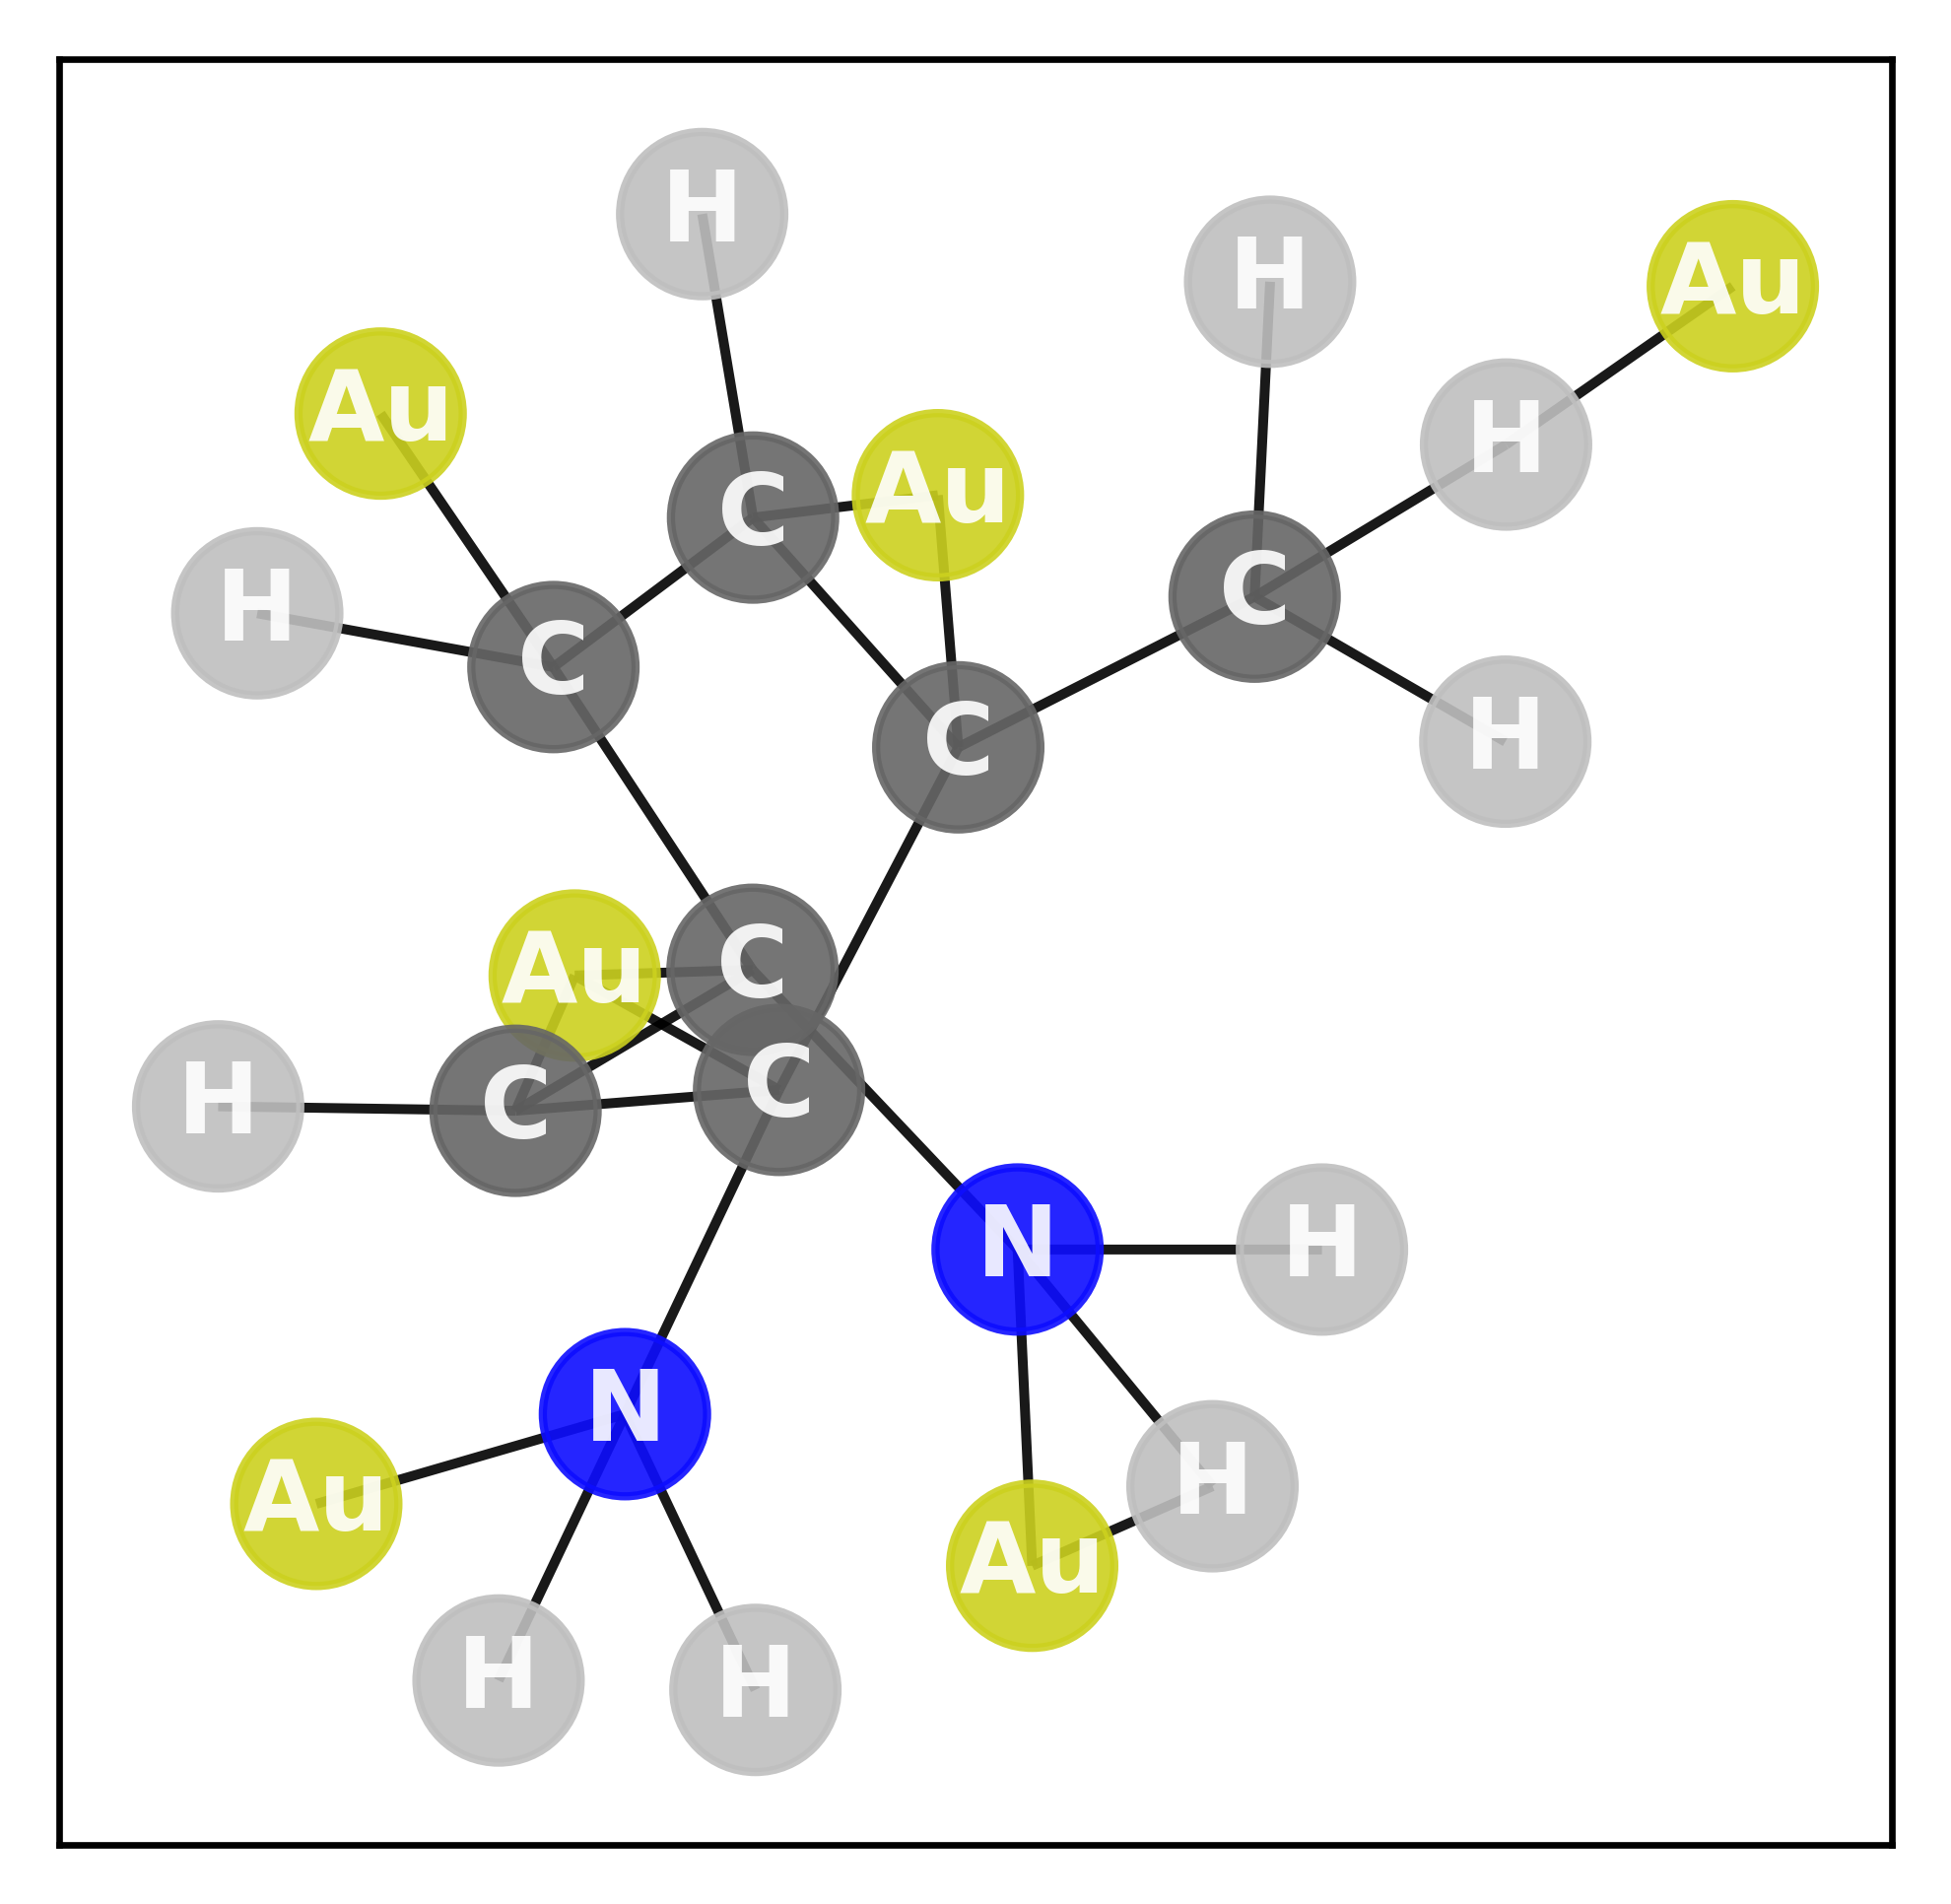

System: au-mol16
GNN energy = -118.05 eV 
VASP energy = -117.80113190000009 eV
Abs. Error = 0.25 eV
-----------------------------------


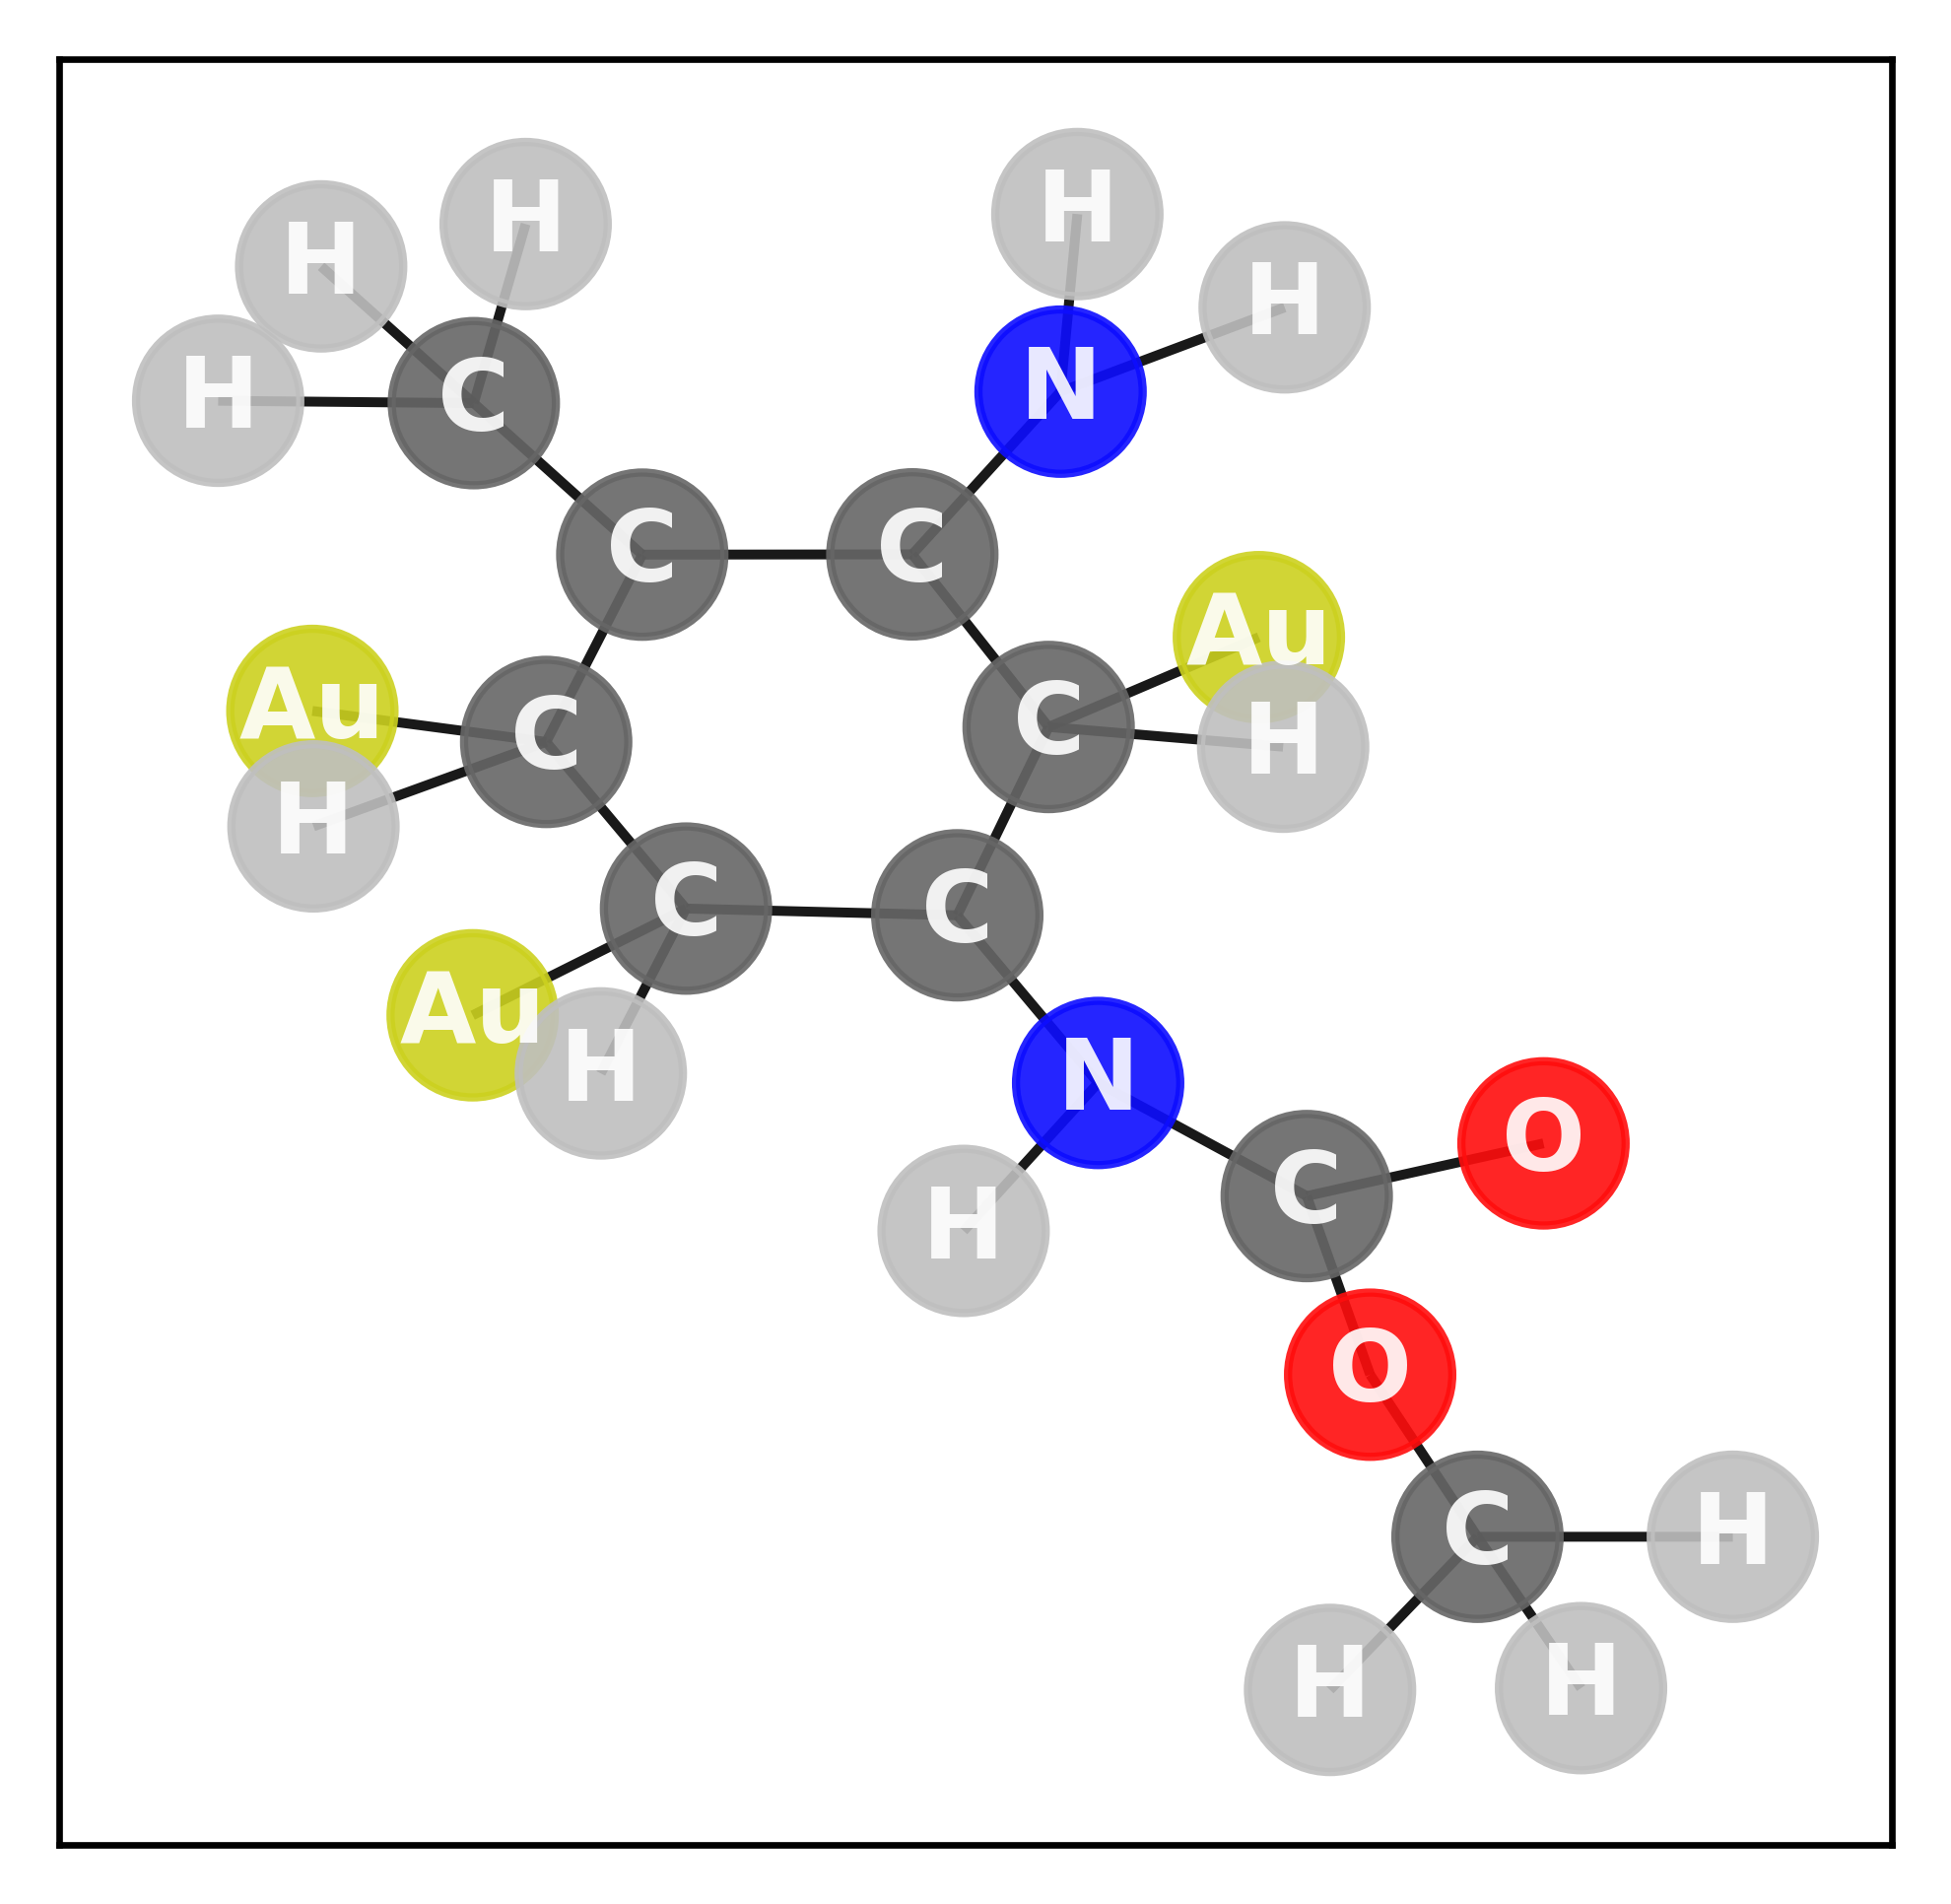

System: au-mol17
GNN energy = -157.79 eV 
VASP energy = -157.0177393900001 eV
Abs. Error = 0.77 eV
-----------------------------------


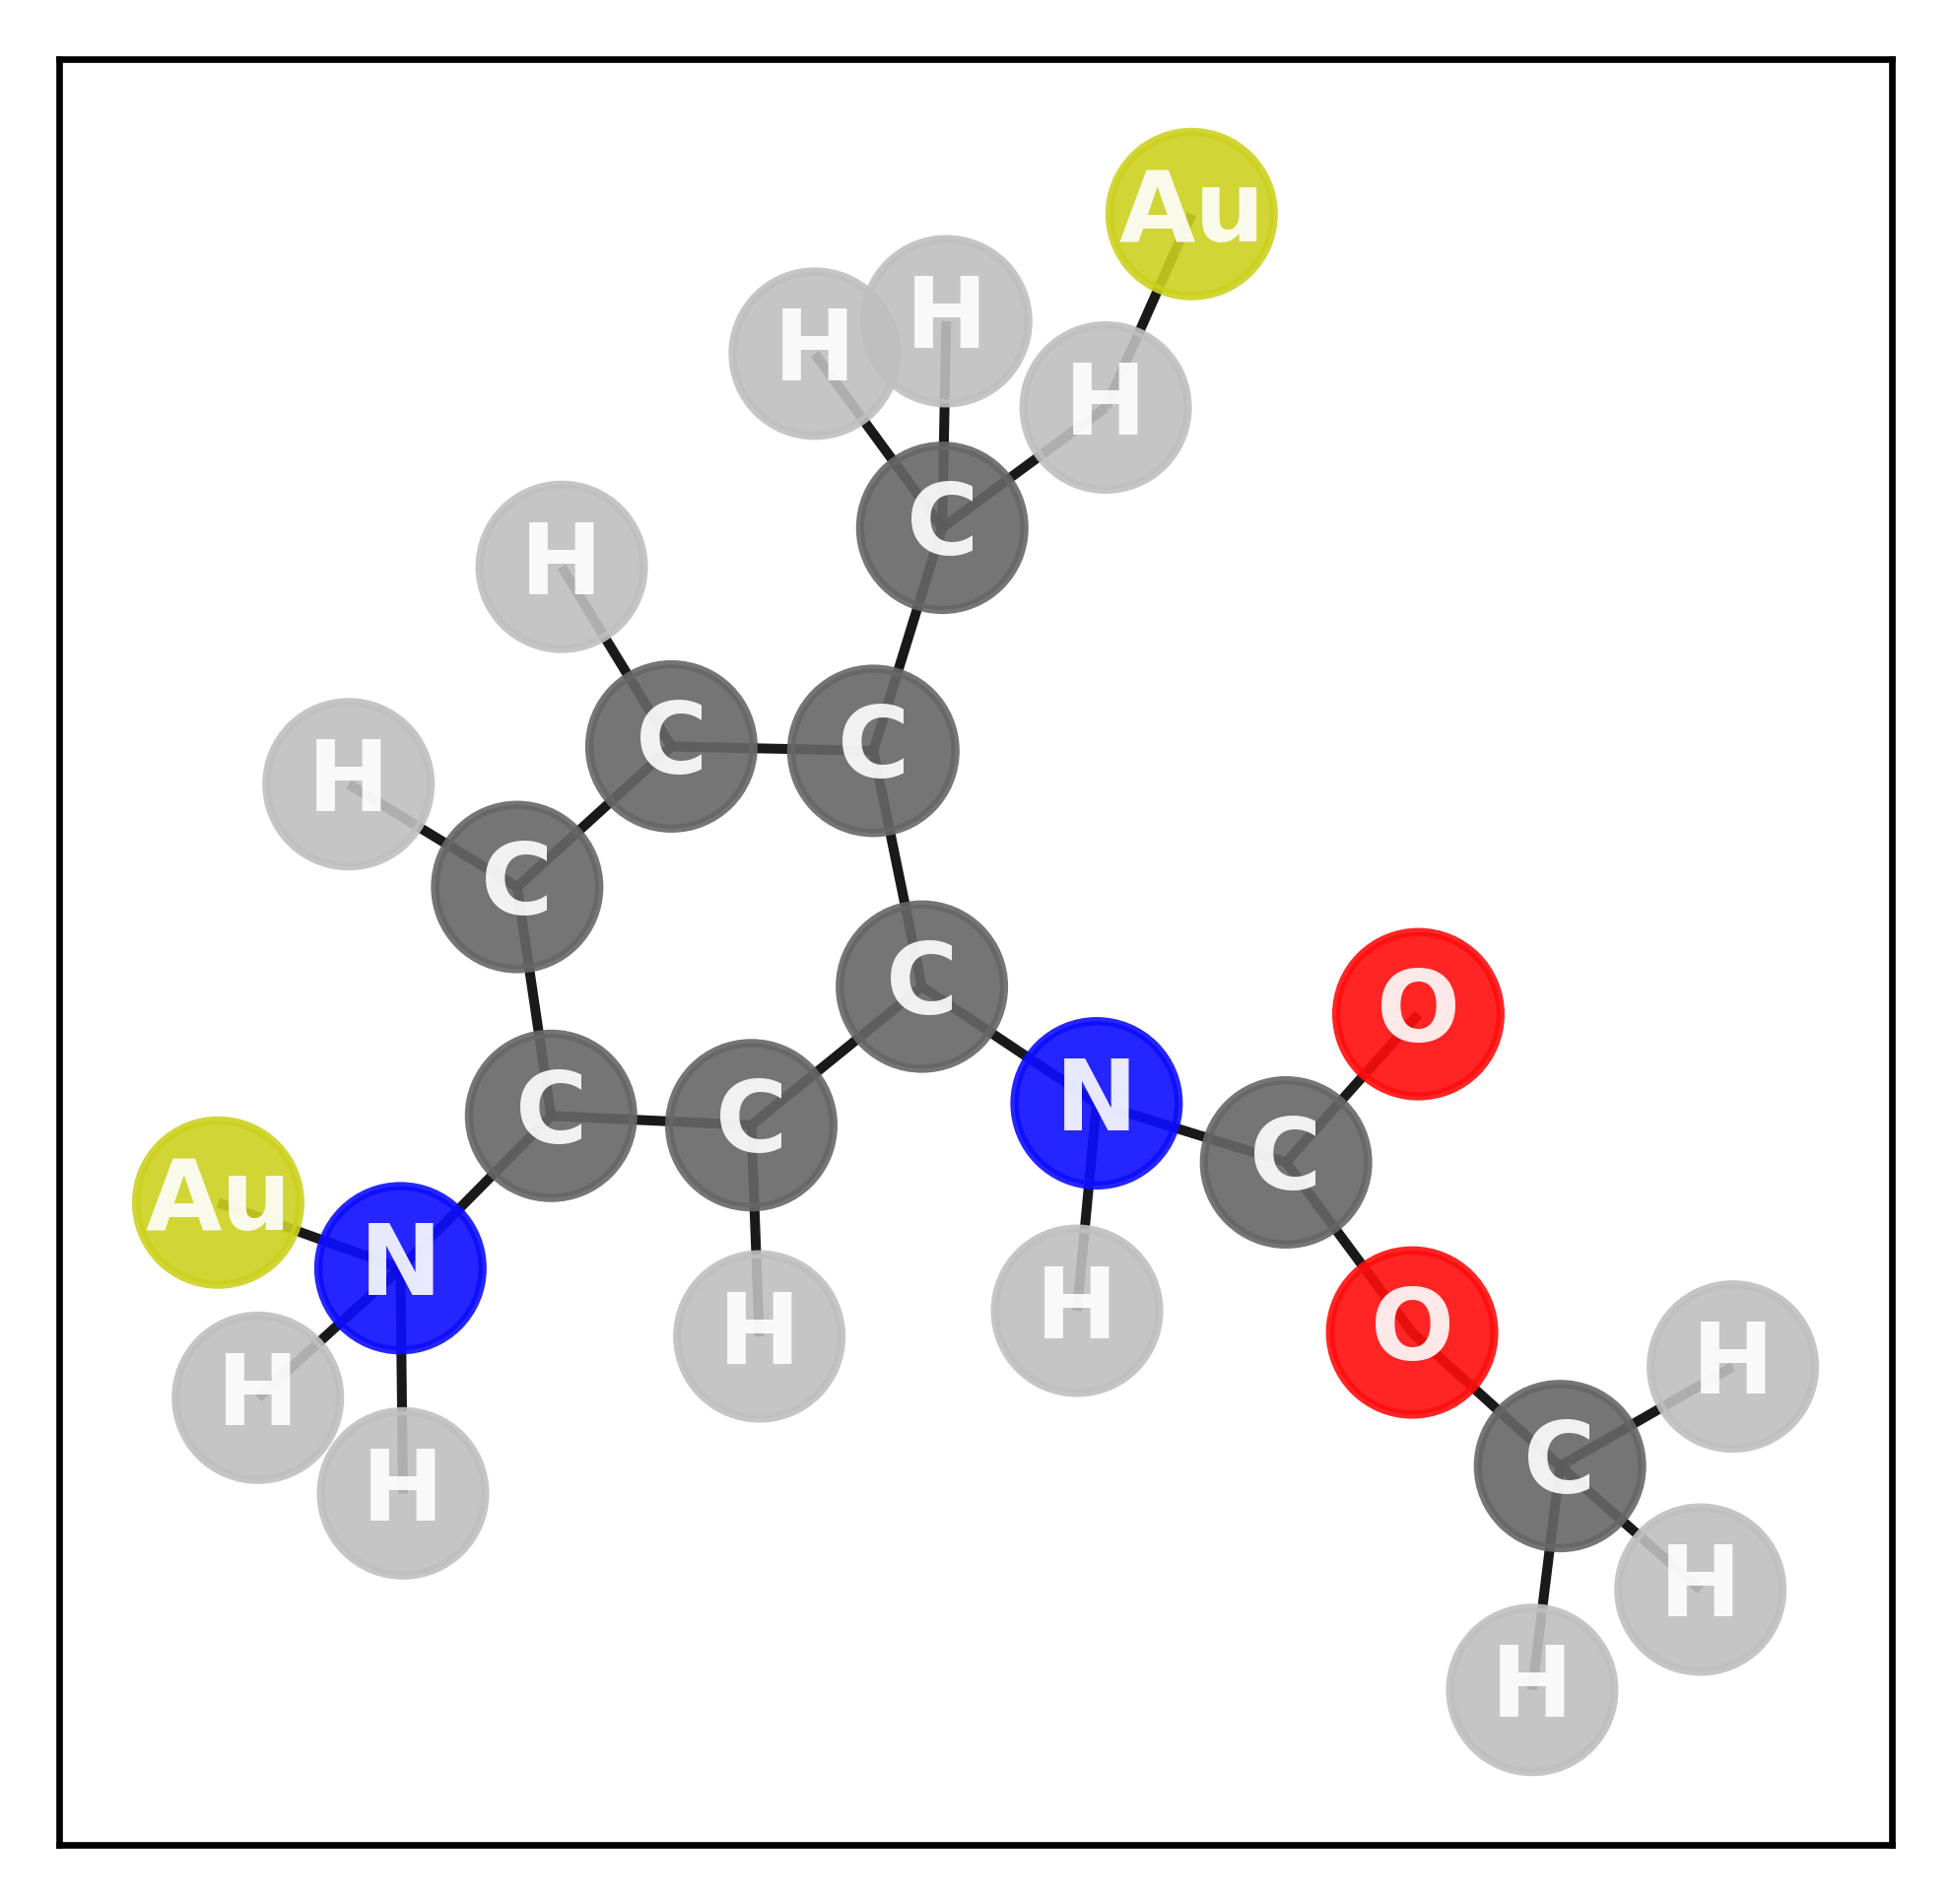

System: au-mol18
GNN energy = -157.13 eV 
VASP energy = -156.93564073000005 eV
Abs. Error = 0.19 eV
-----------------------------------


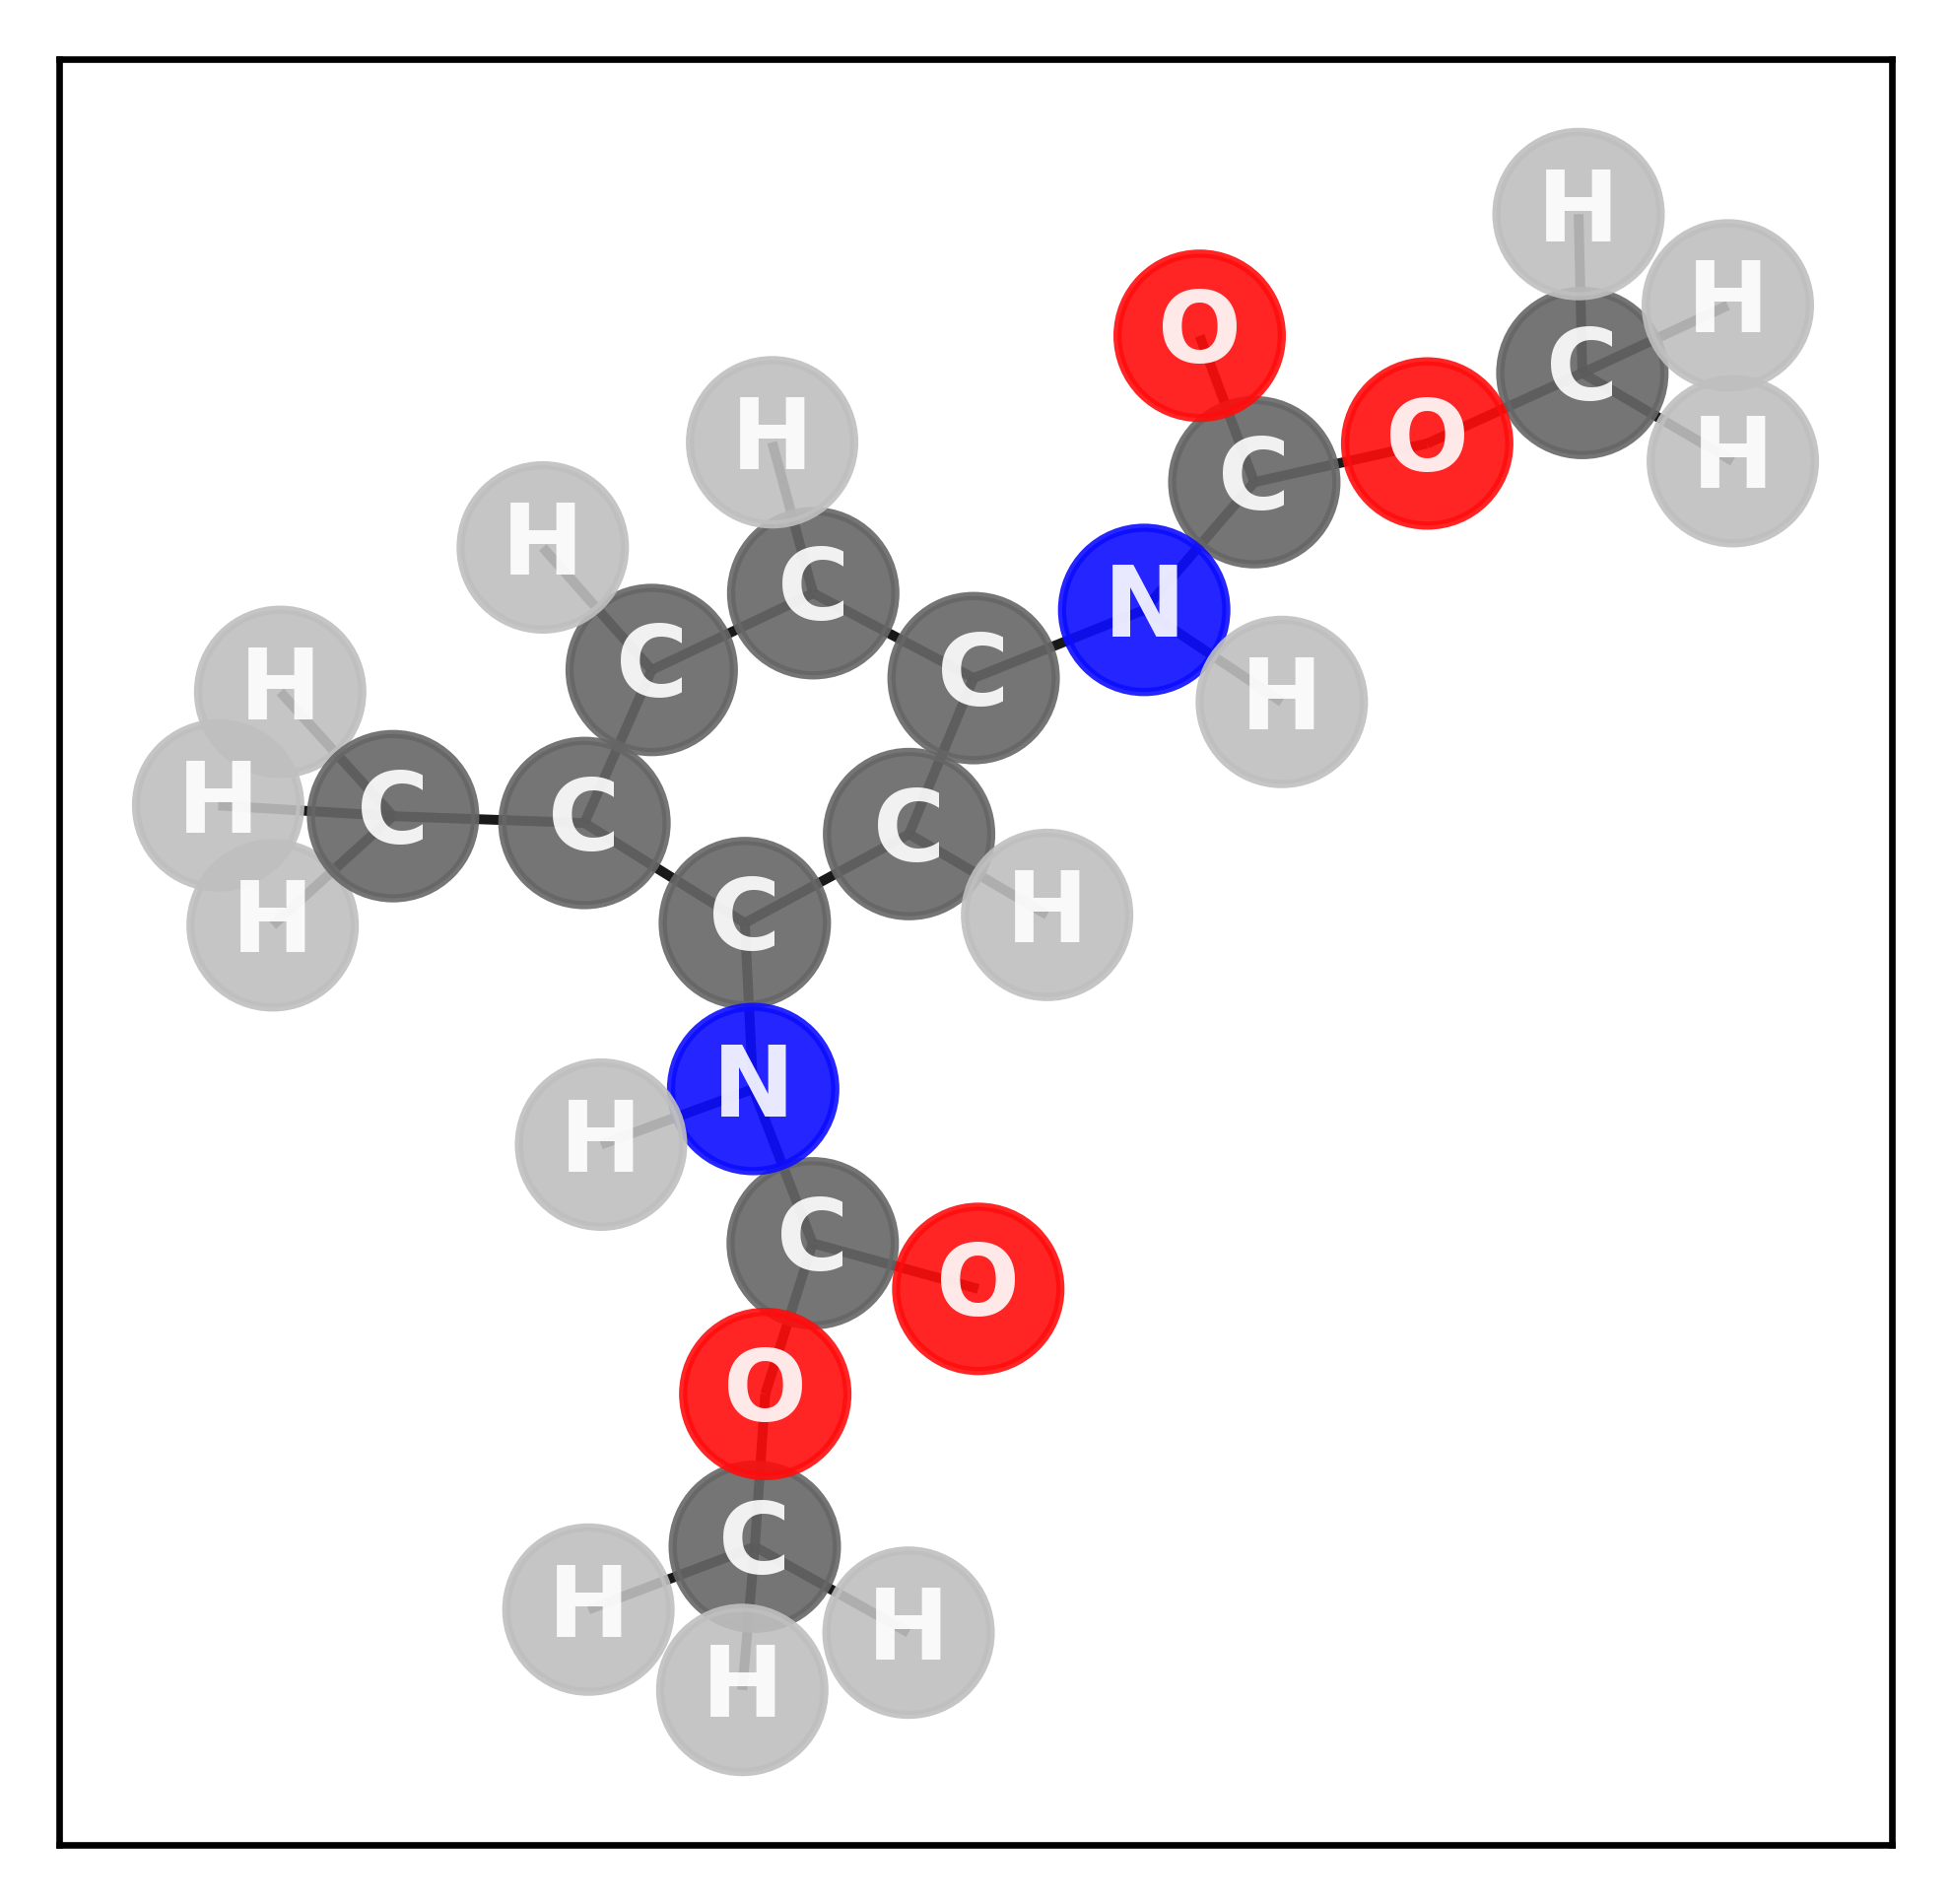

System: au-mol19
GNN energy = -195.86 eV 
VASP energy = -196.24380310000004 eV
Abs. Error = 0.39 eV
-----------------------------------


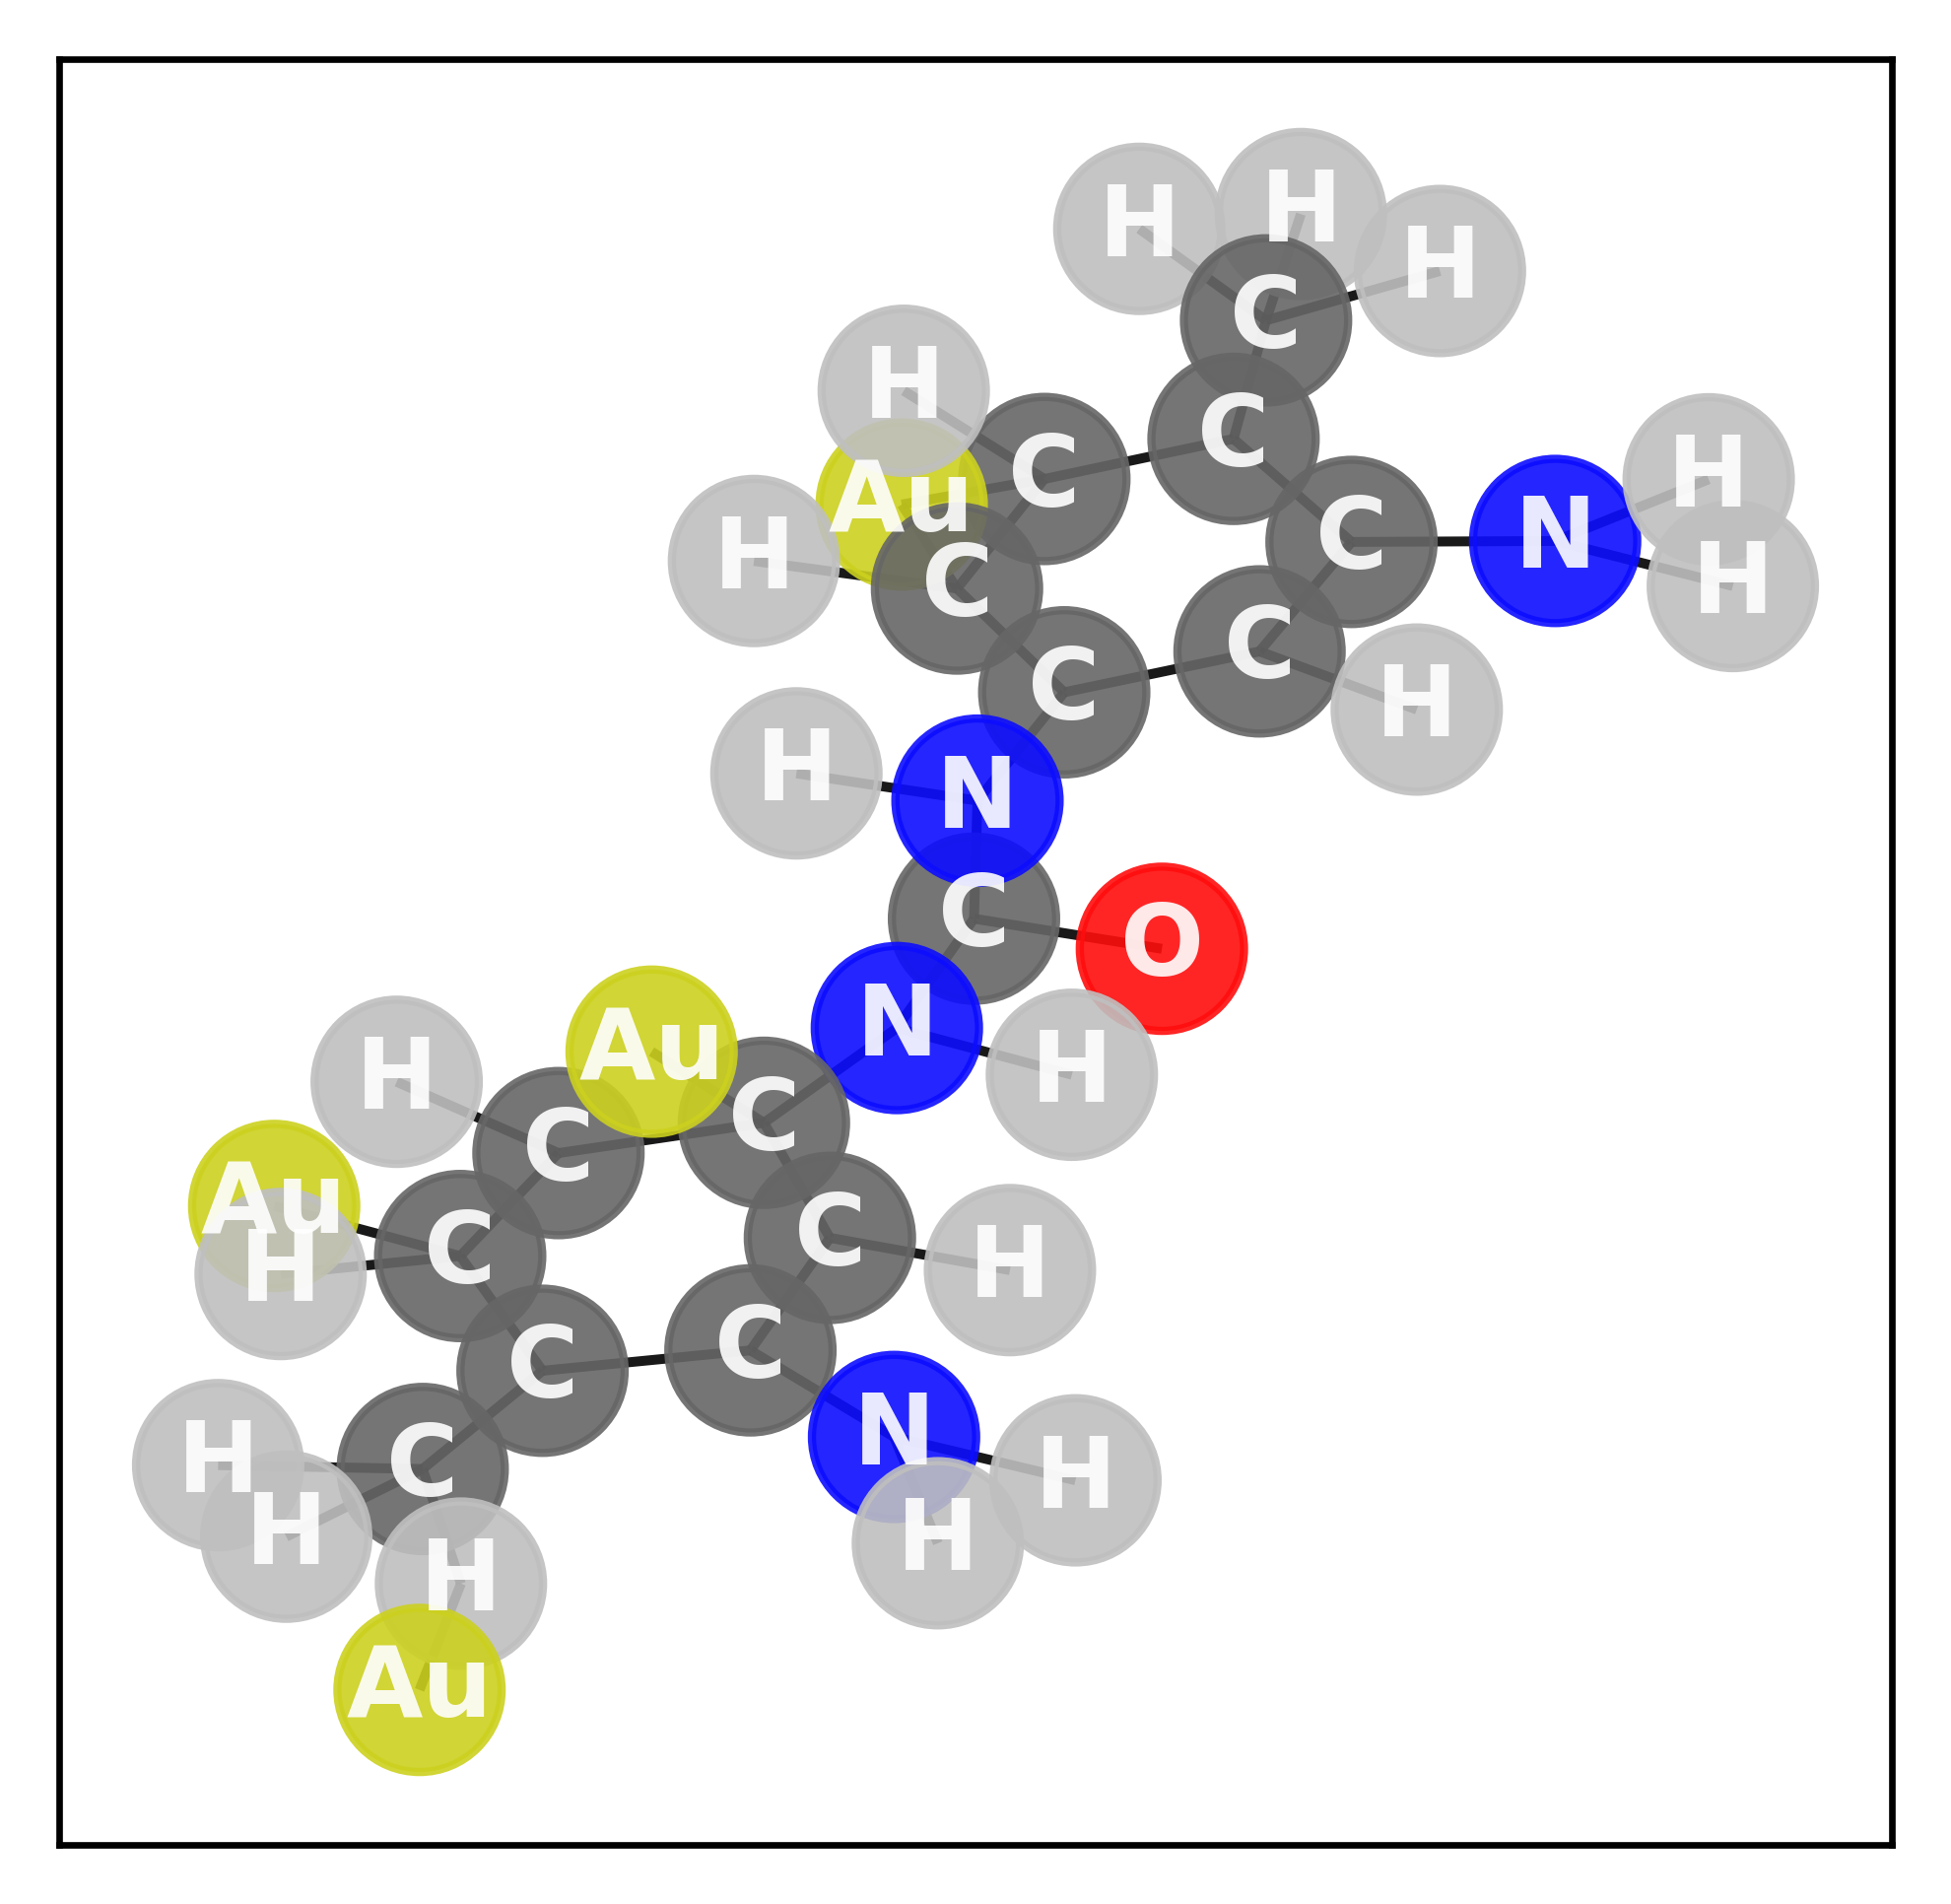

System: au-mol41
GNN energy = -244.04 eV 
VASP energy = -244.31561998000006 eV
Abs. Error = 0.27 eV
-----------------------------------


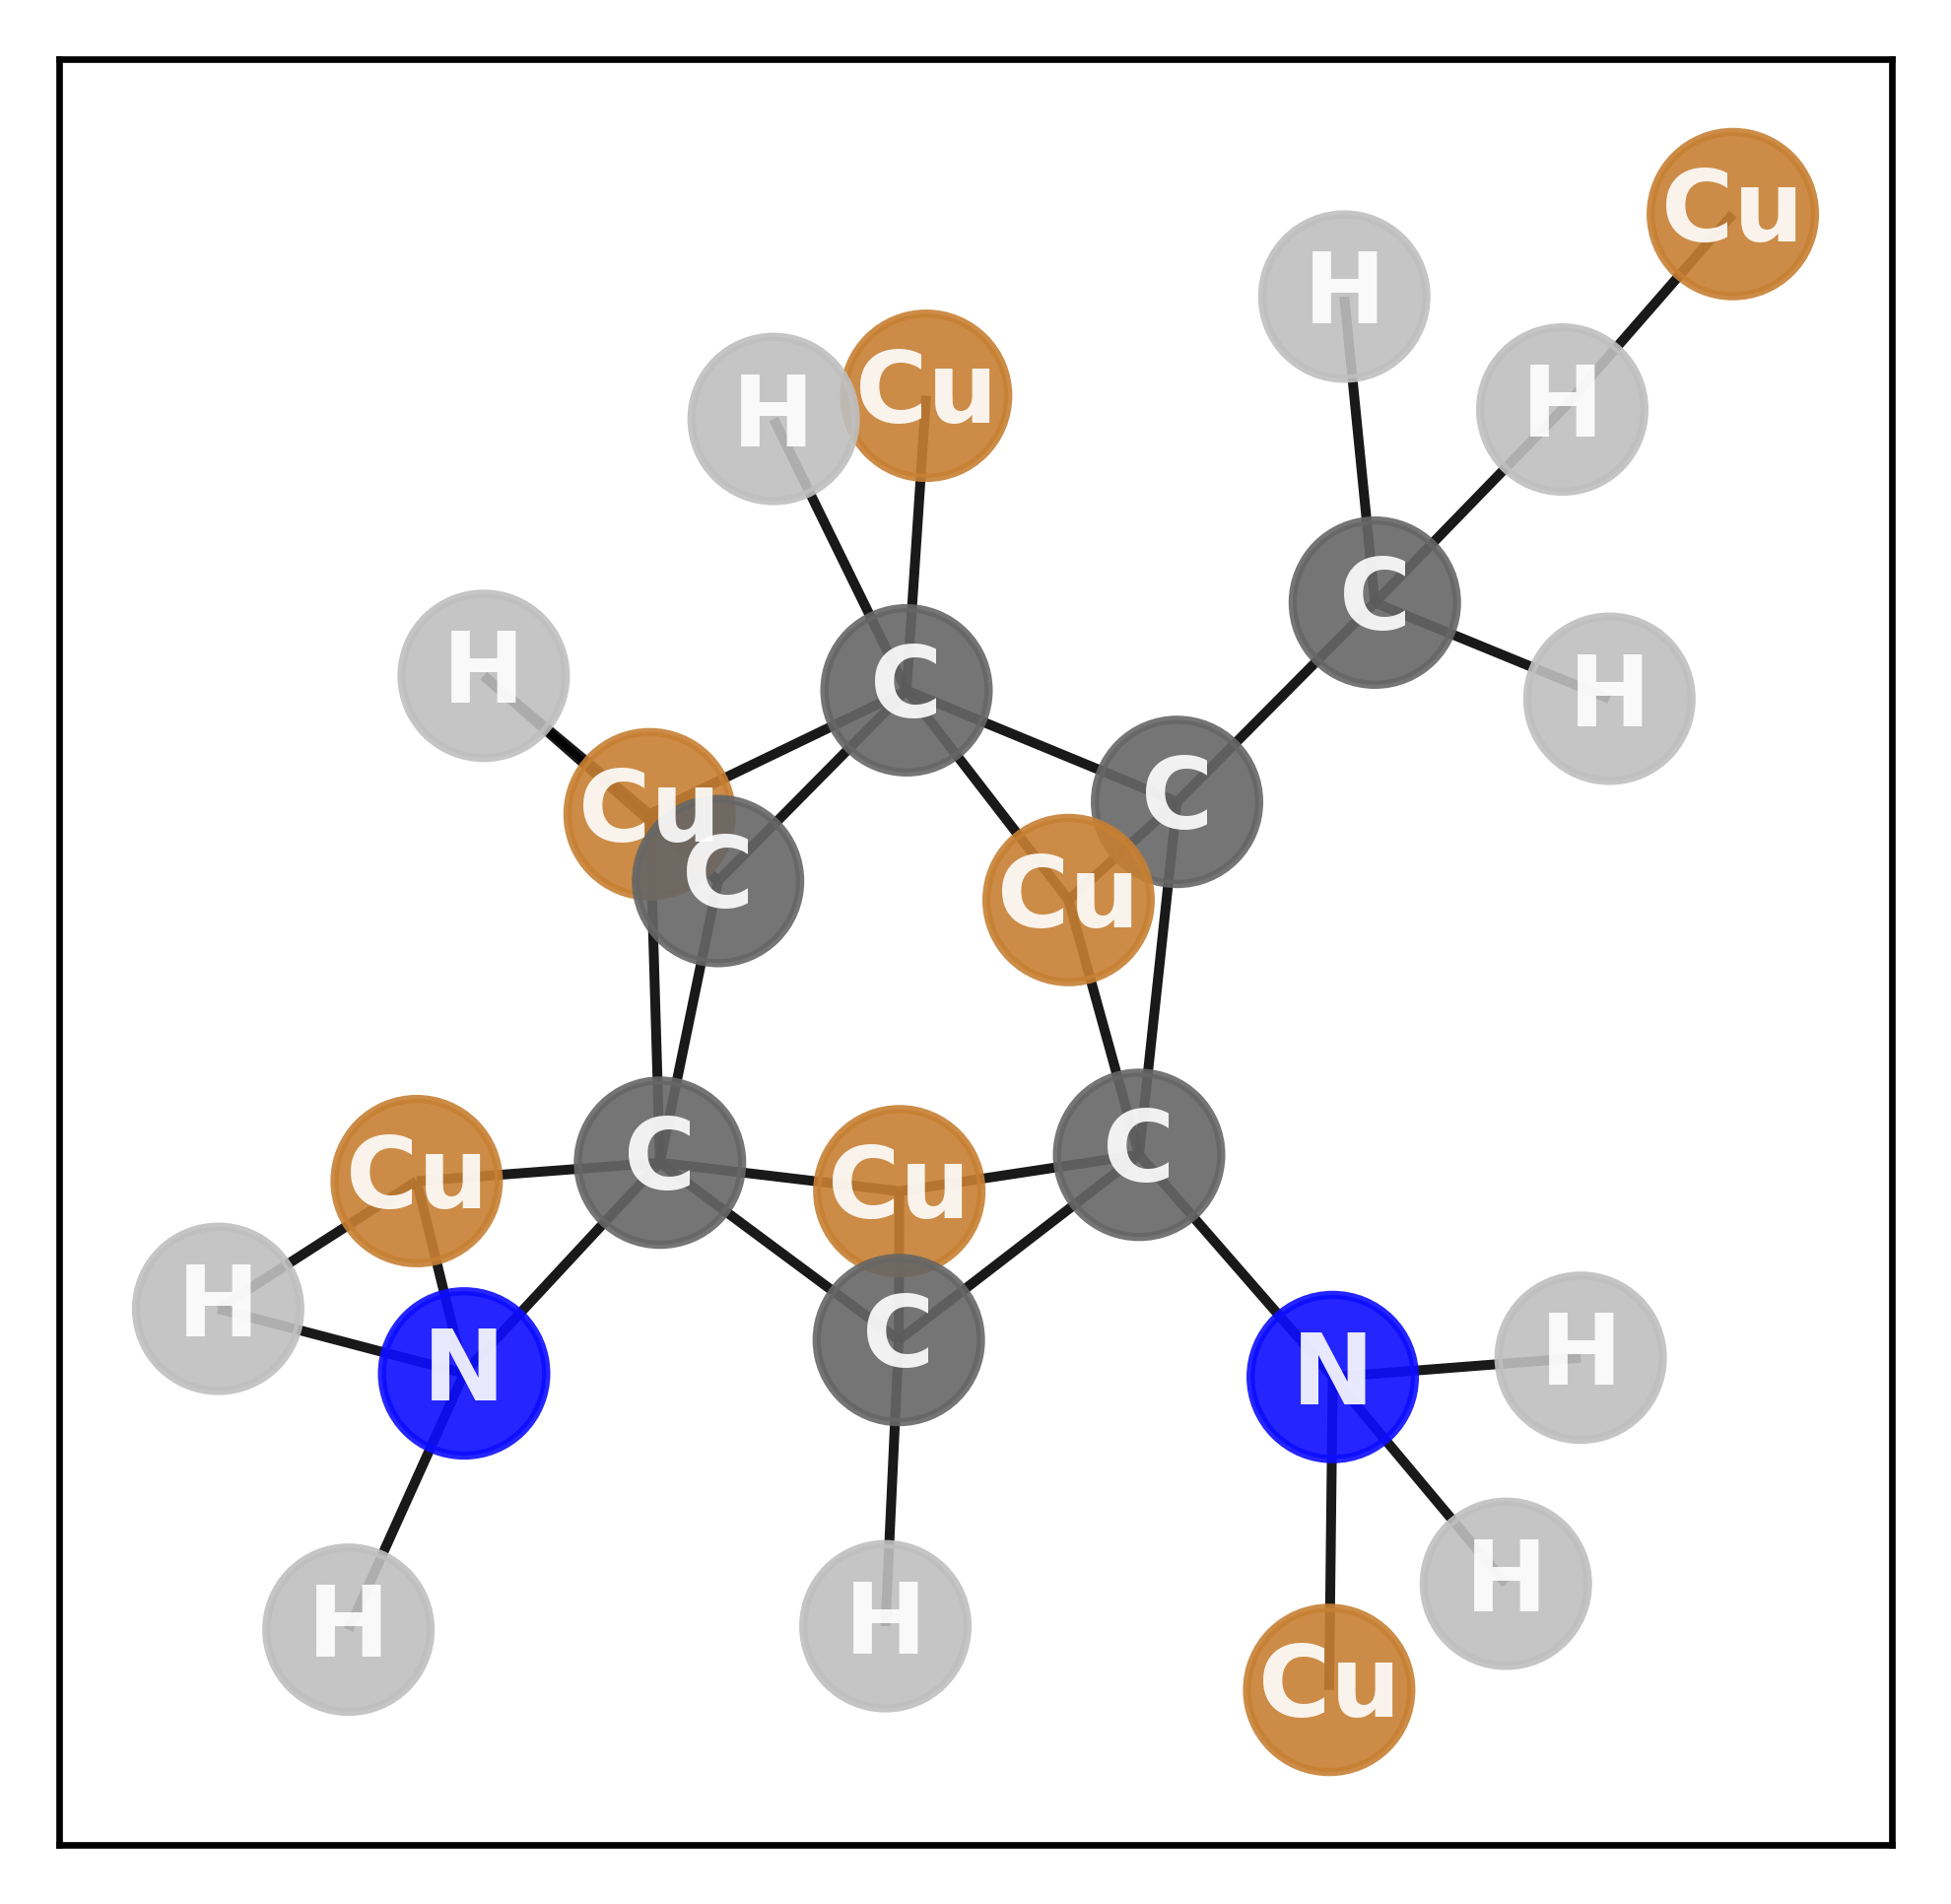

System: cu-mol16
GNN energy = -117.31 eV 
VASP energy = -118.46814558999995 eV
Abs. Error = 1.16 eV
-----------------------------------


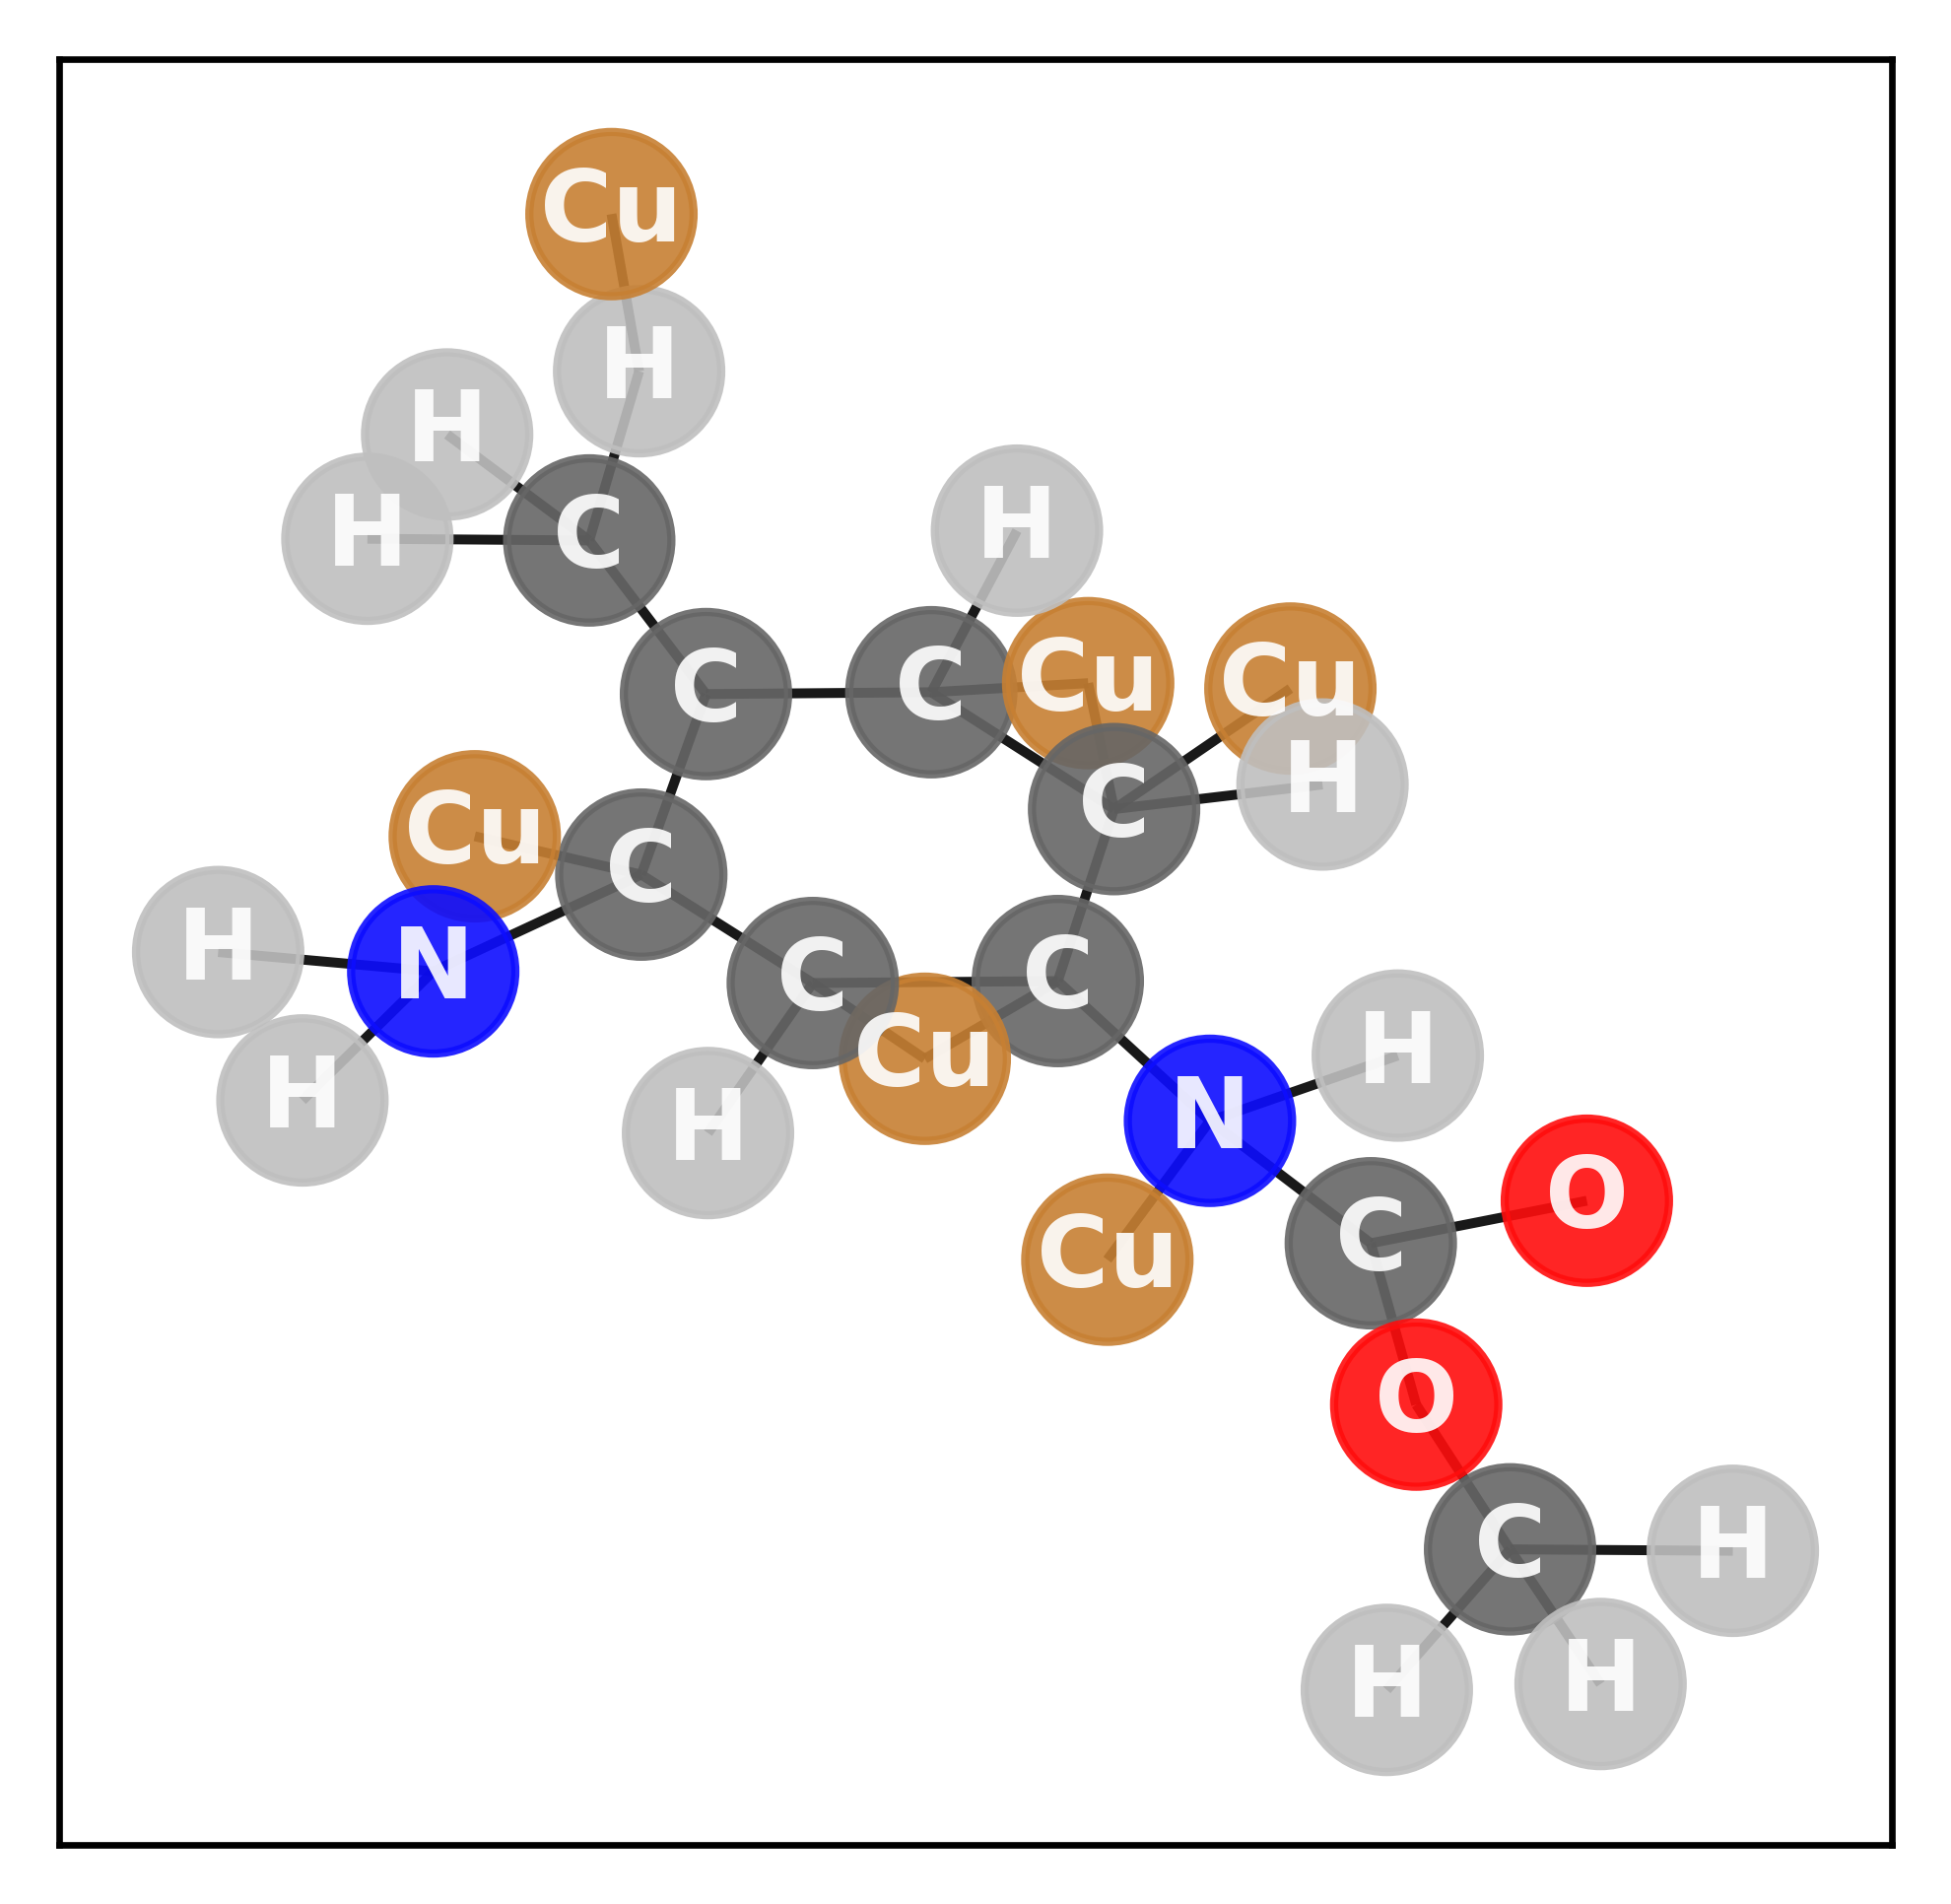

System: cu-mol17
GNN energy = -157.65 eV 
VASP energy = -157.59770521999997 eV
Abs. Error = 0.05 eV
-----------------------------------


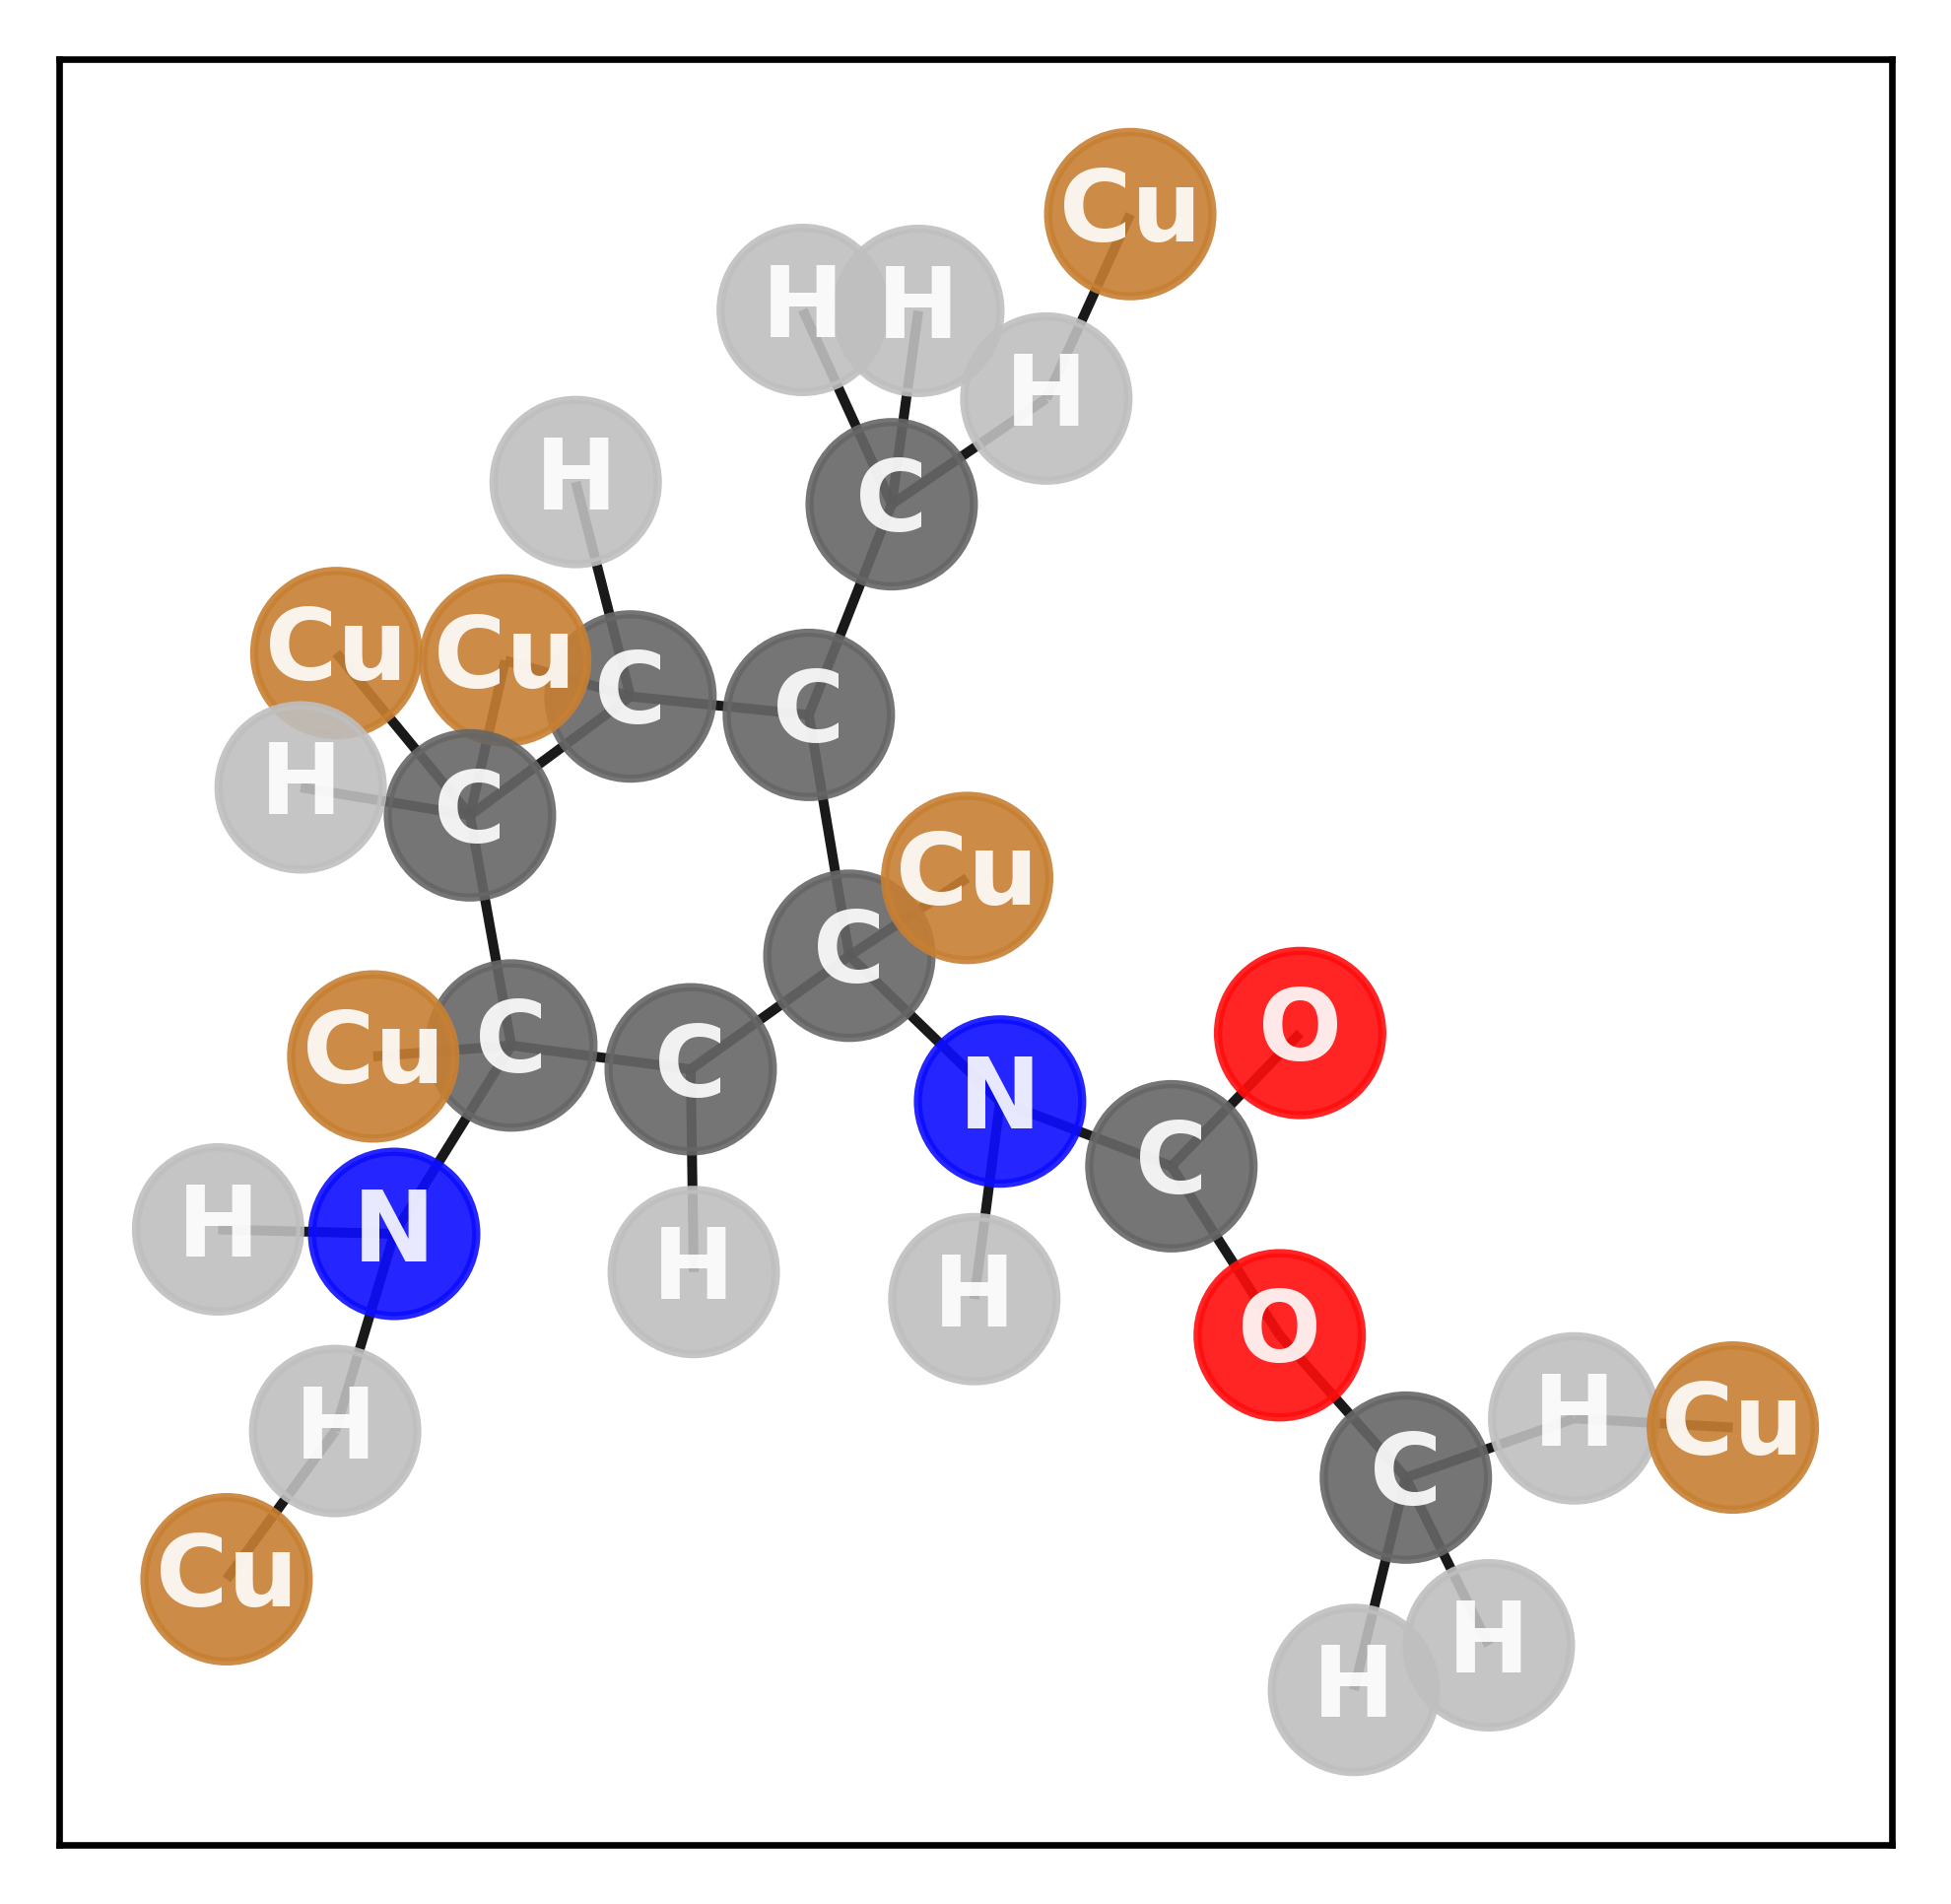

System: cu-mol18
GNN energy = -157.29 eV 
VASP energy = -157.54930794999996 eV
Abs. Error = 0.26 eV
-----------------------------------


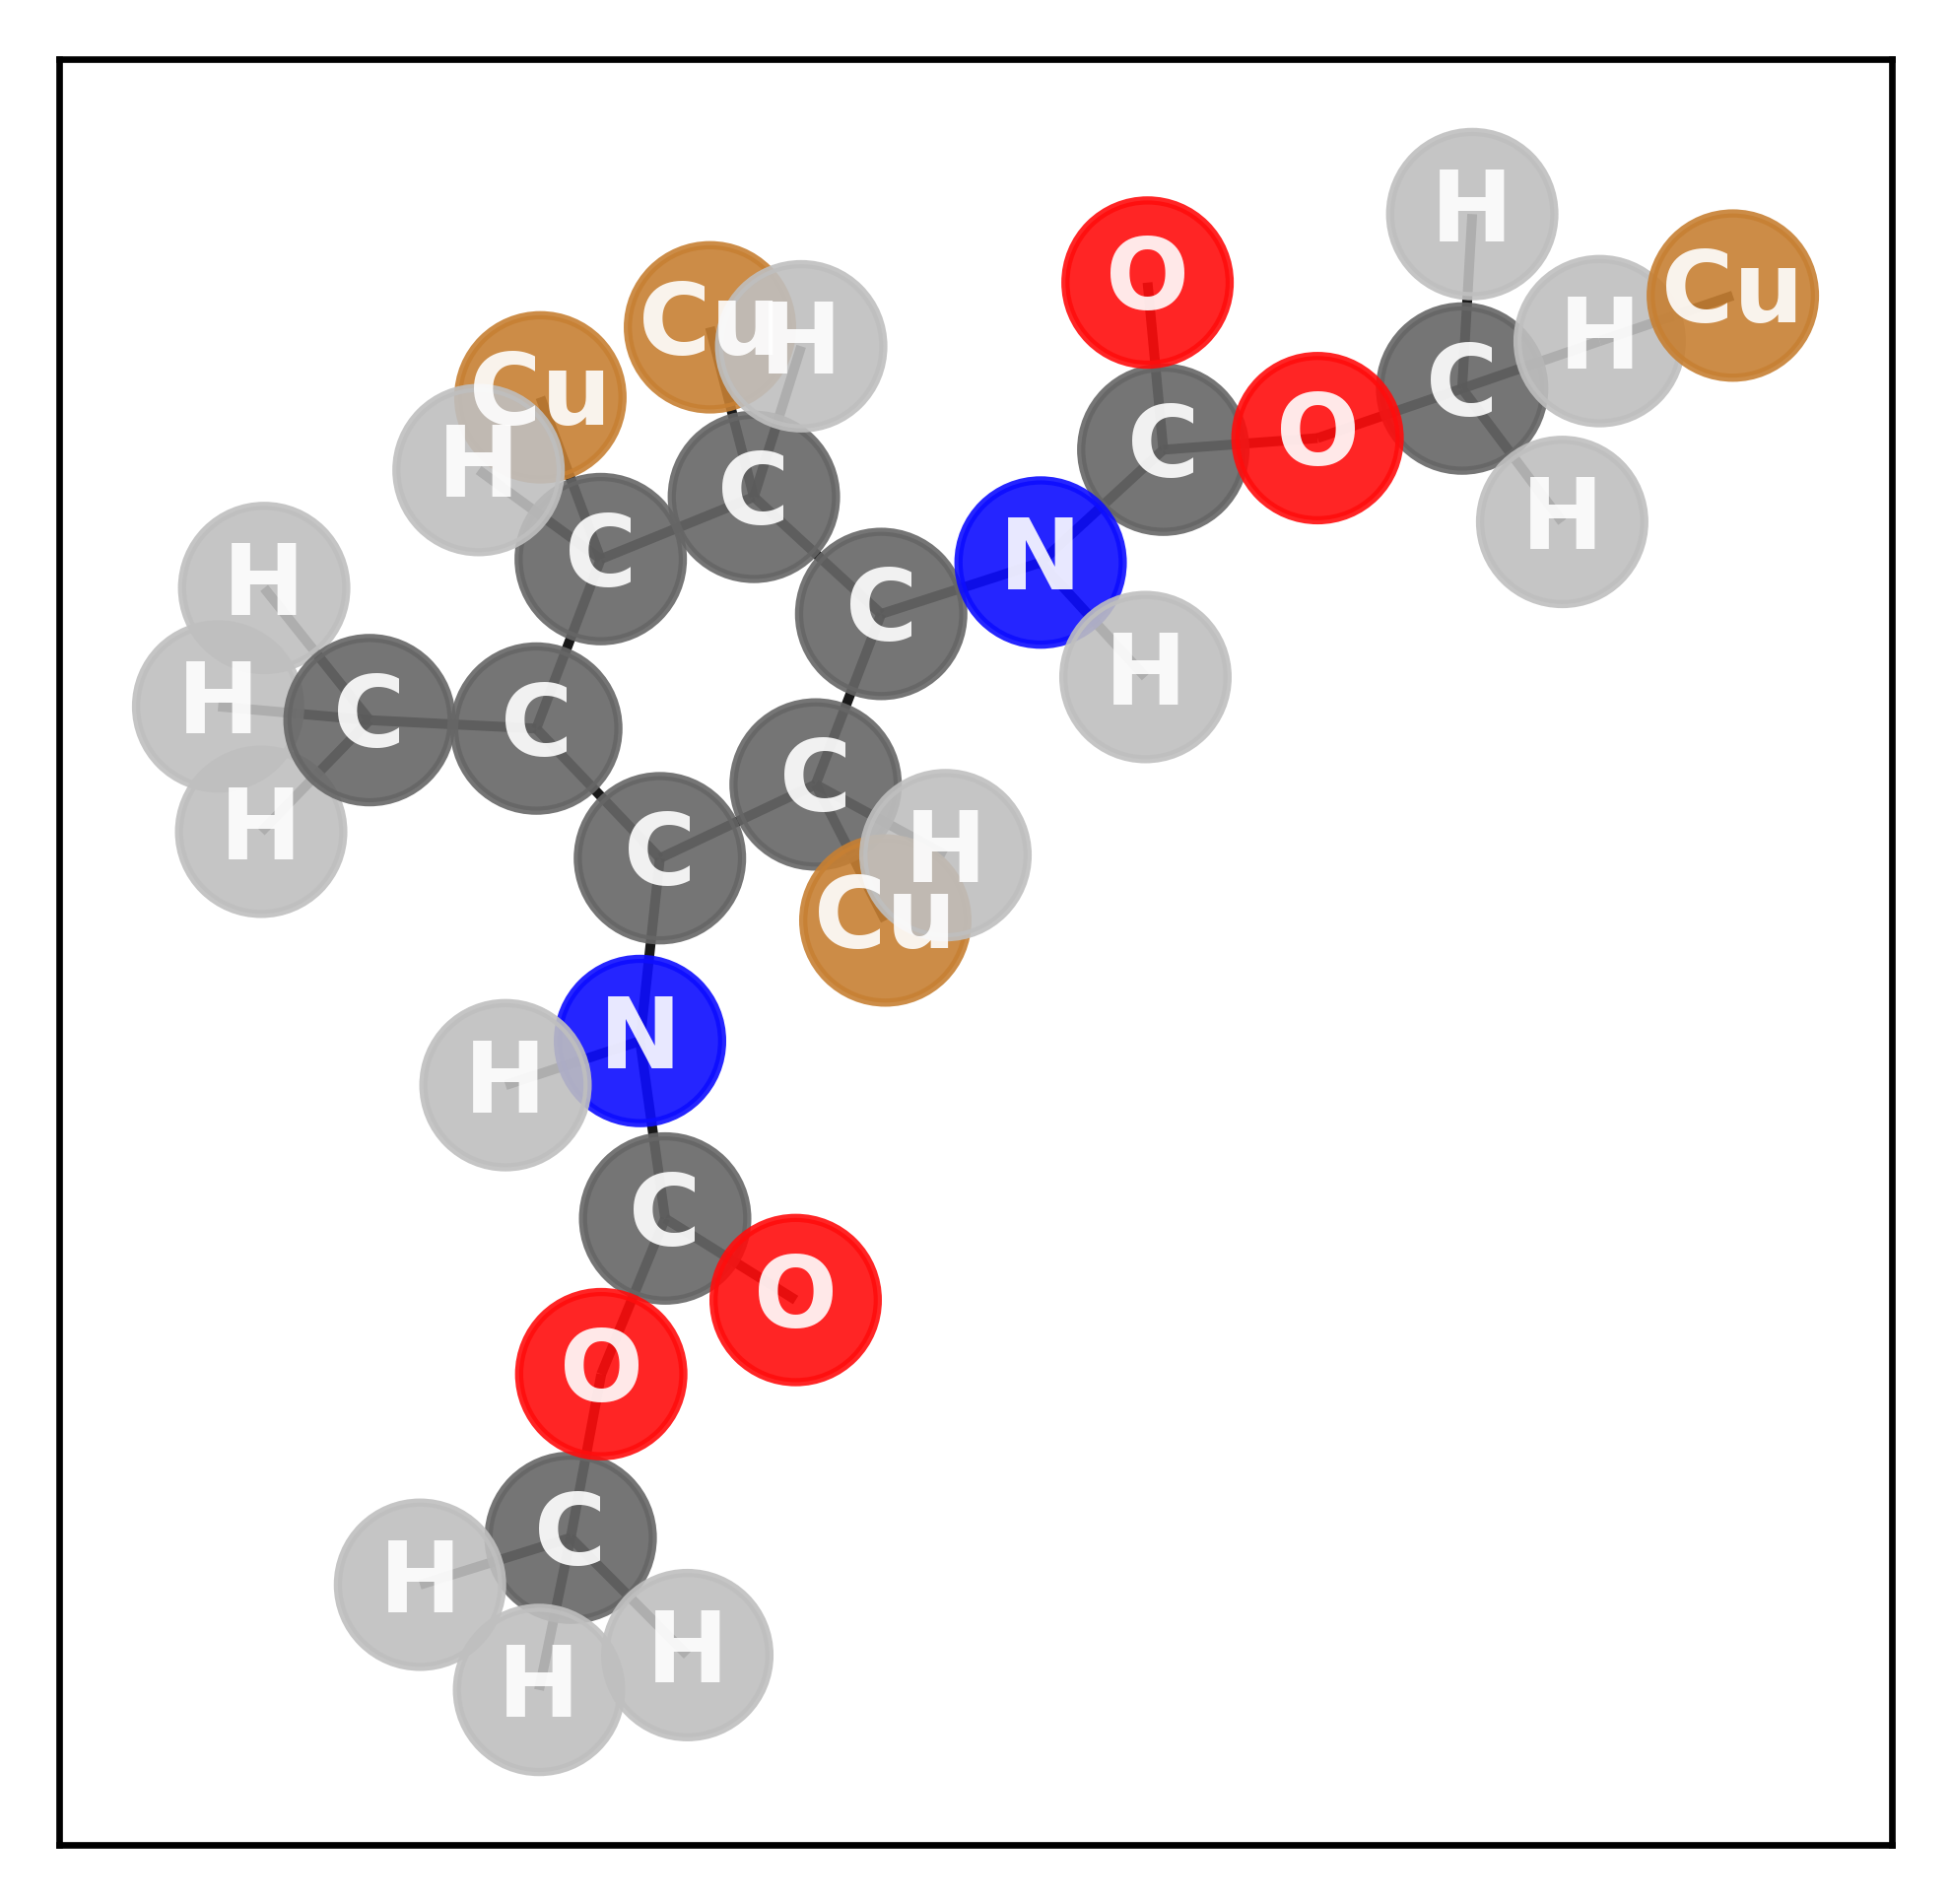

System: cu-mol19
GNN energy = -196.48 eV 
VASP energy = -196.82126069999993 eV
Abs. Error = 0.34 eV
-----------------------------------


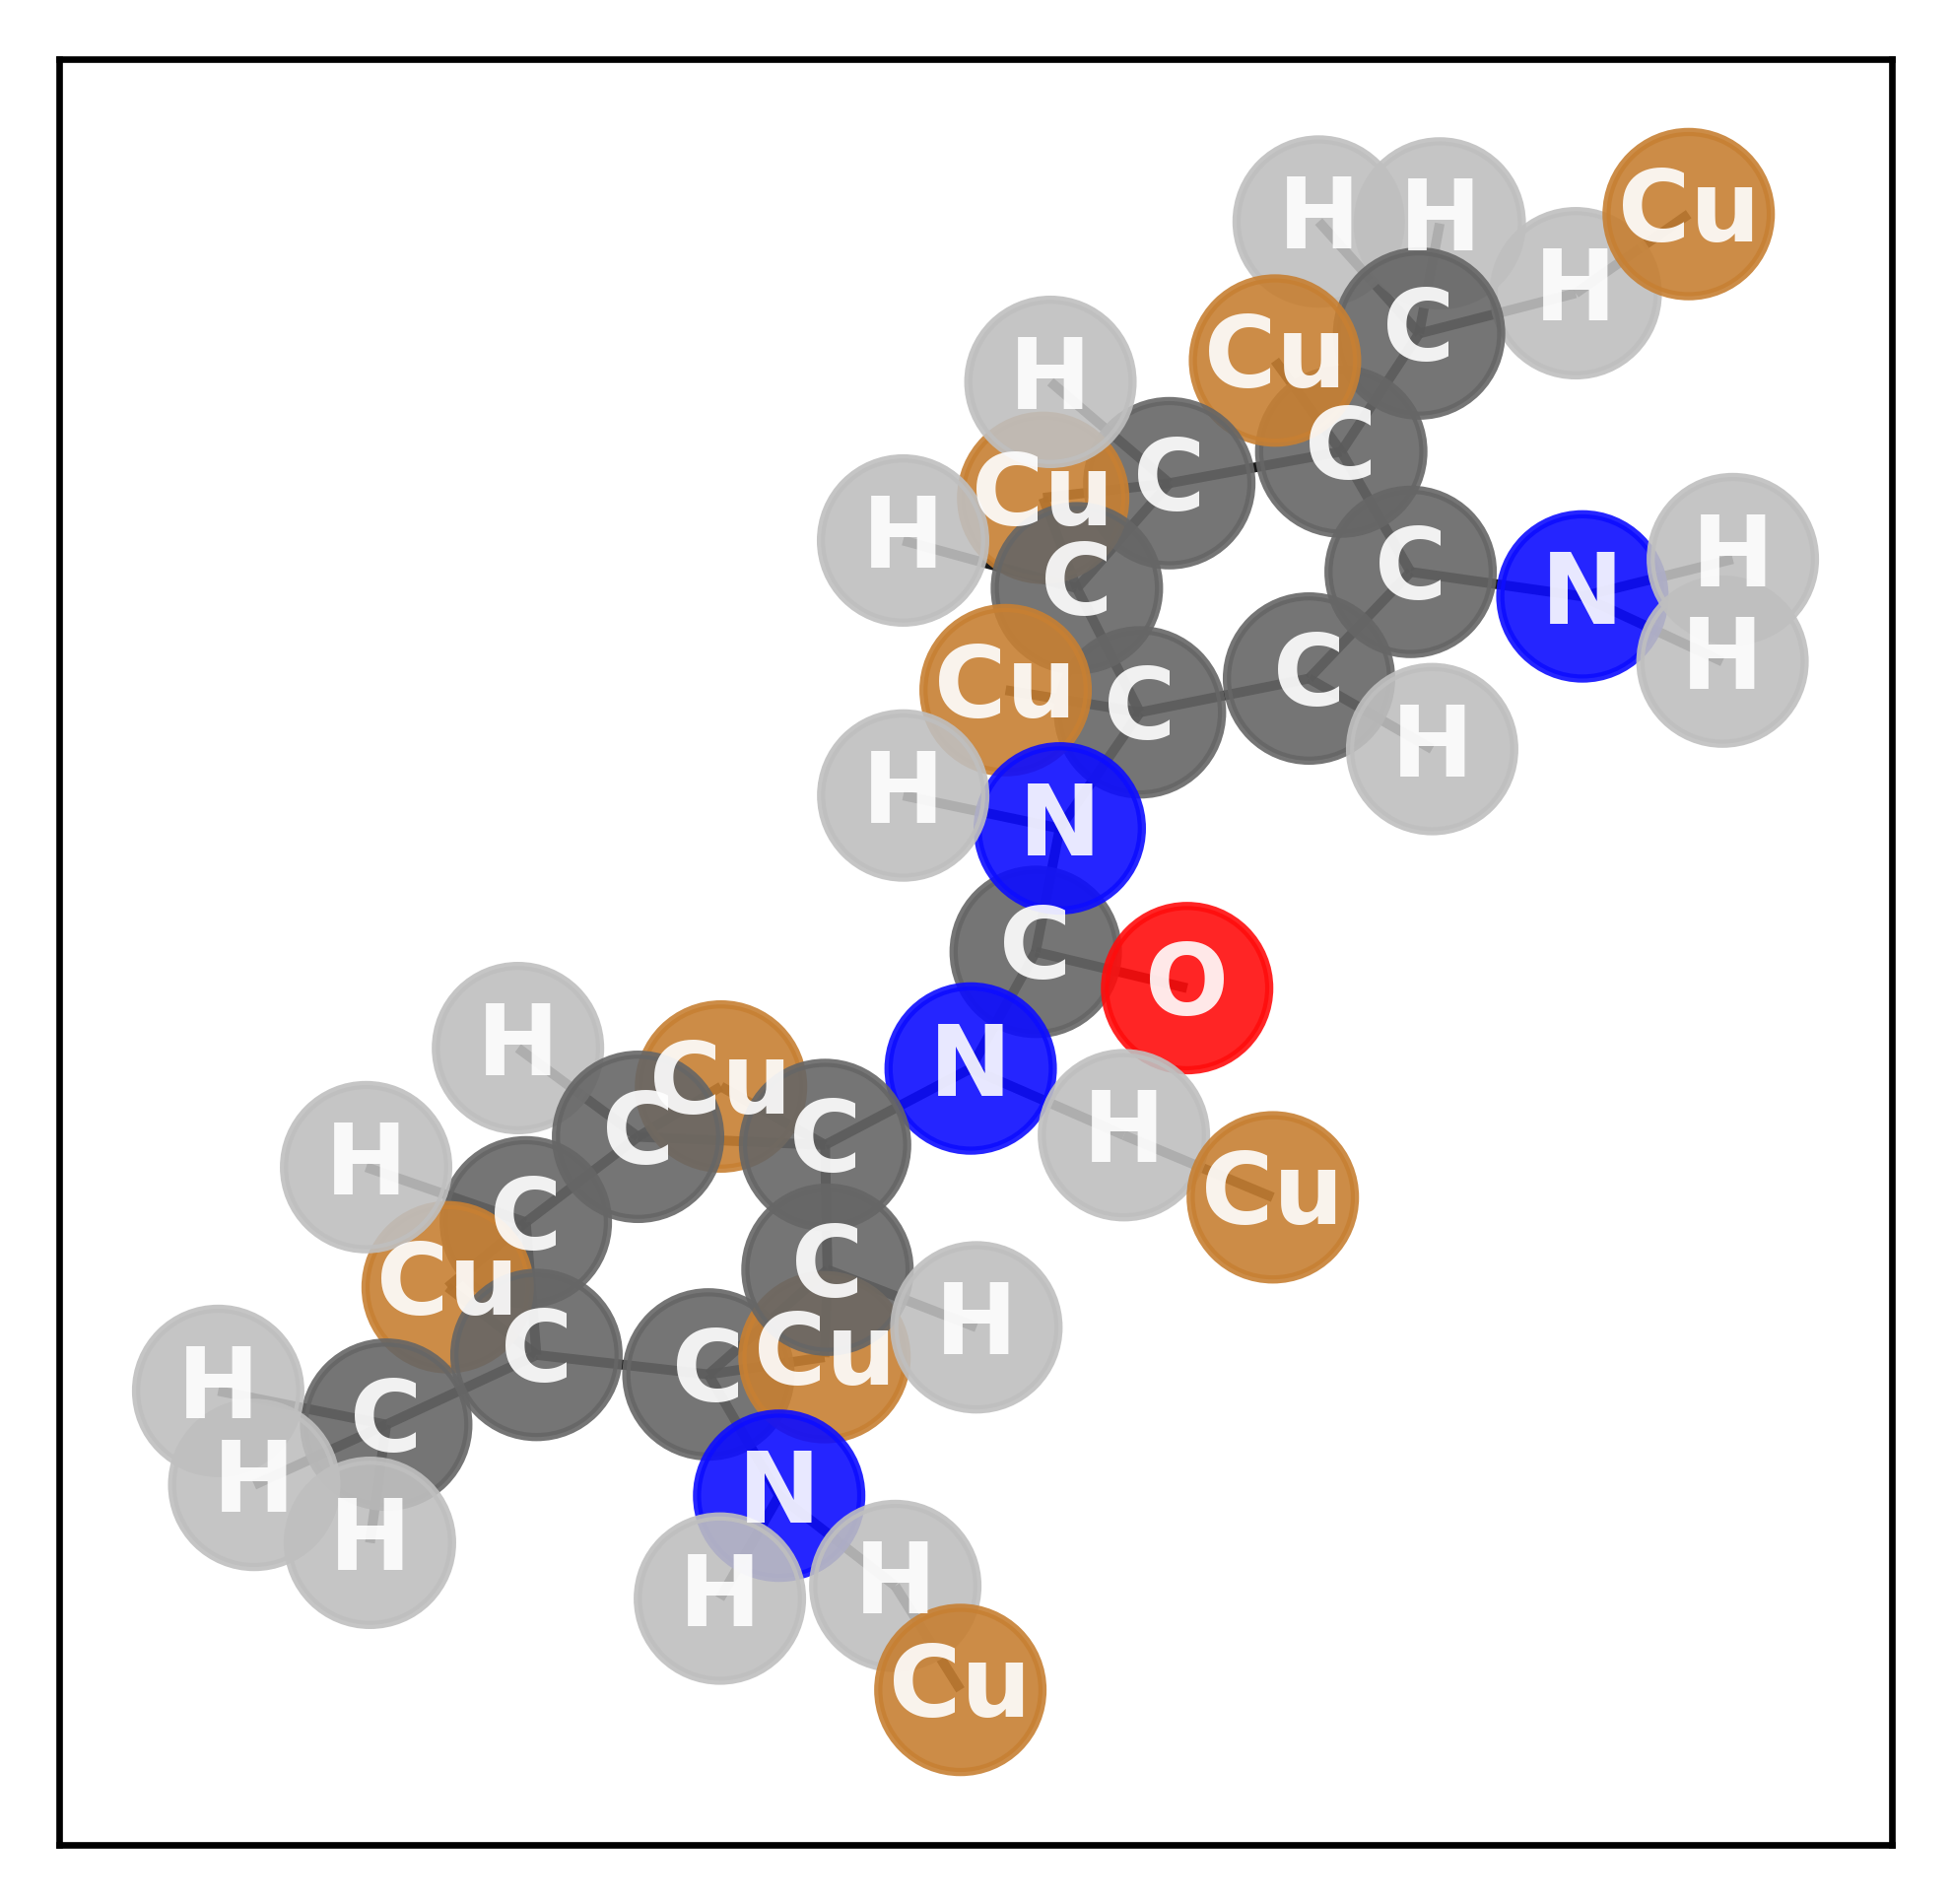

System: cu-mol41
GNN energy = -244.64 eV 
VASP energy = -244.91745026 eV
Abs. Error = 0.28 eV
-----------------------------------


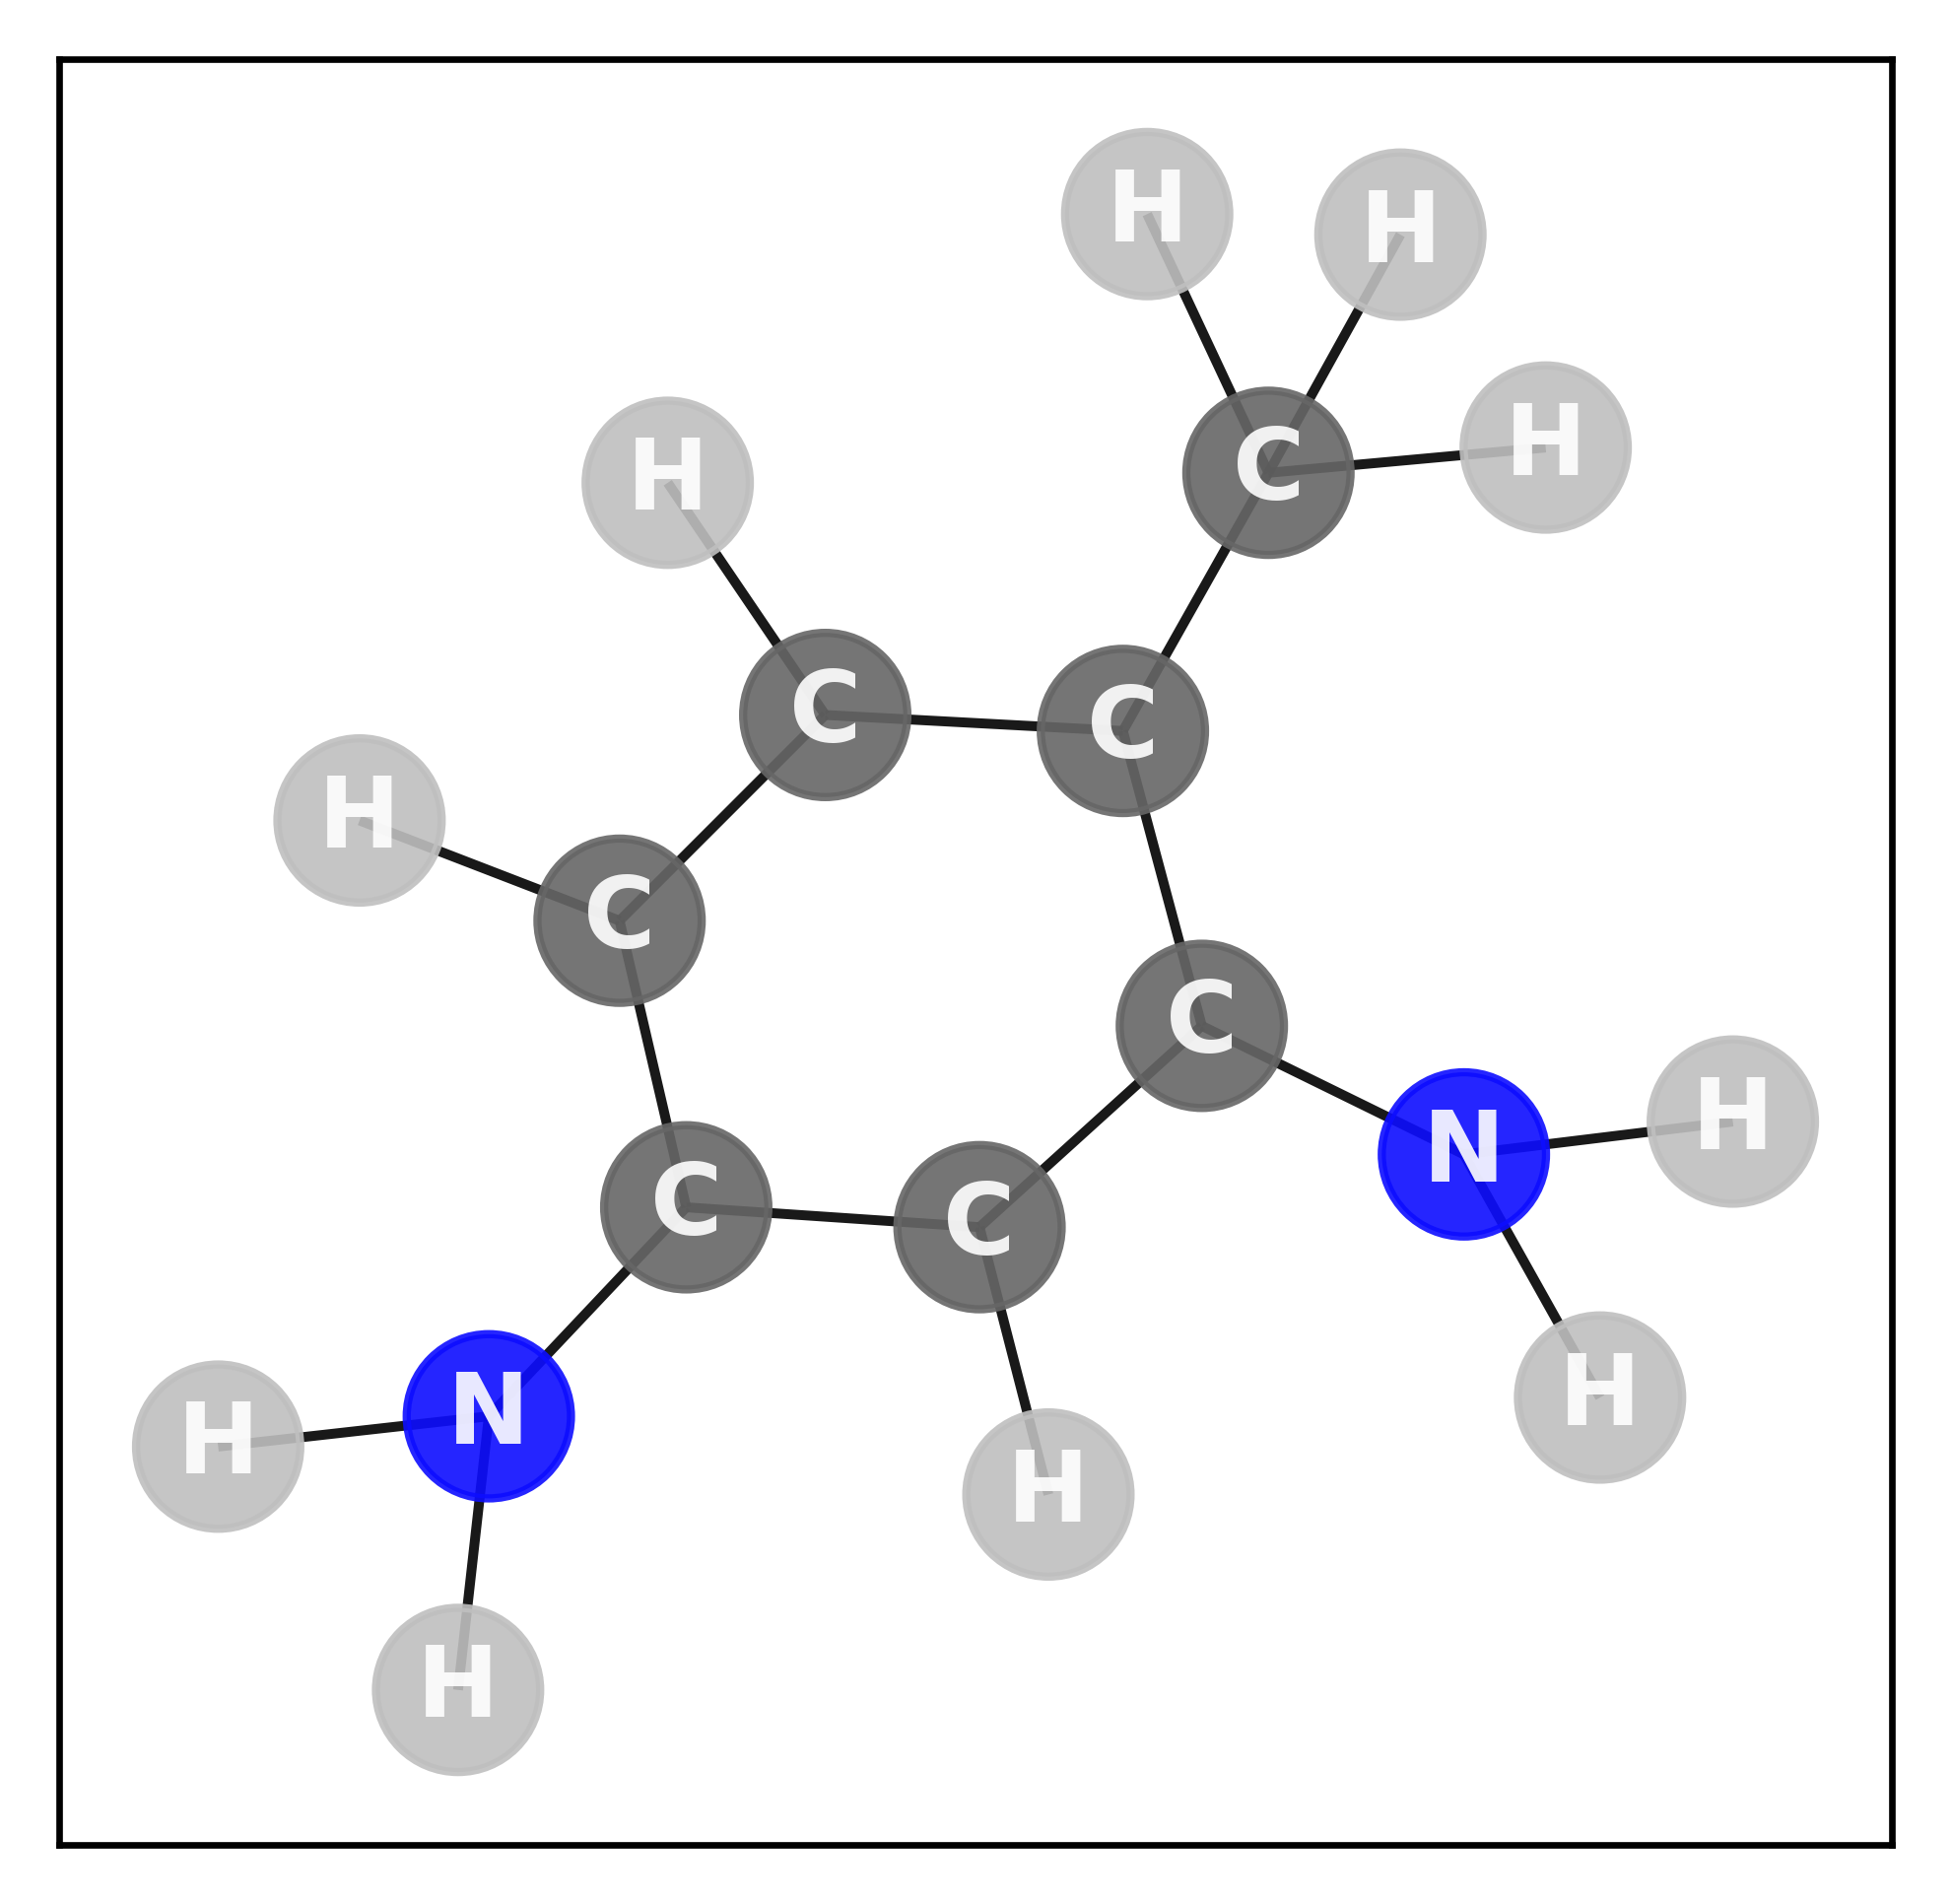

System: mol16
GNN energy = -117.93 eV 
VASP energy = -117.29813031 eV
Abs. Error = 0.63 eV
-----------------------------------


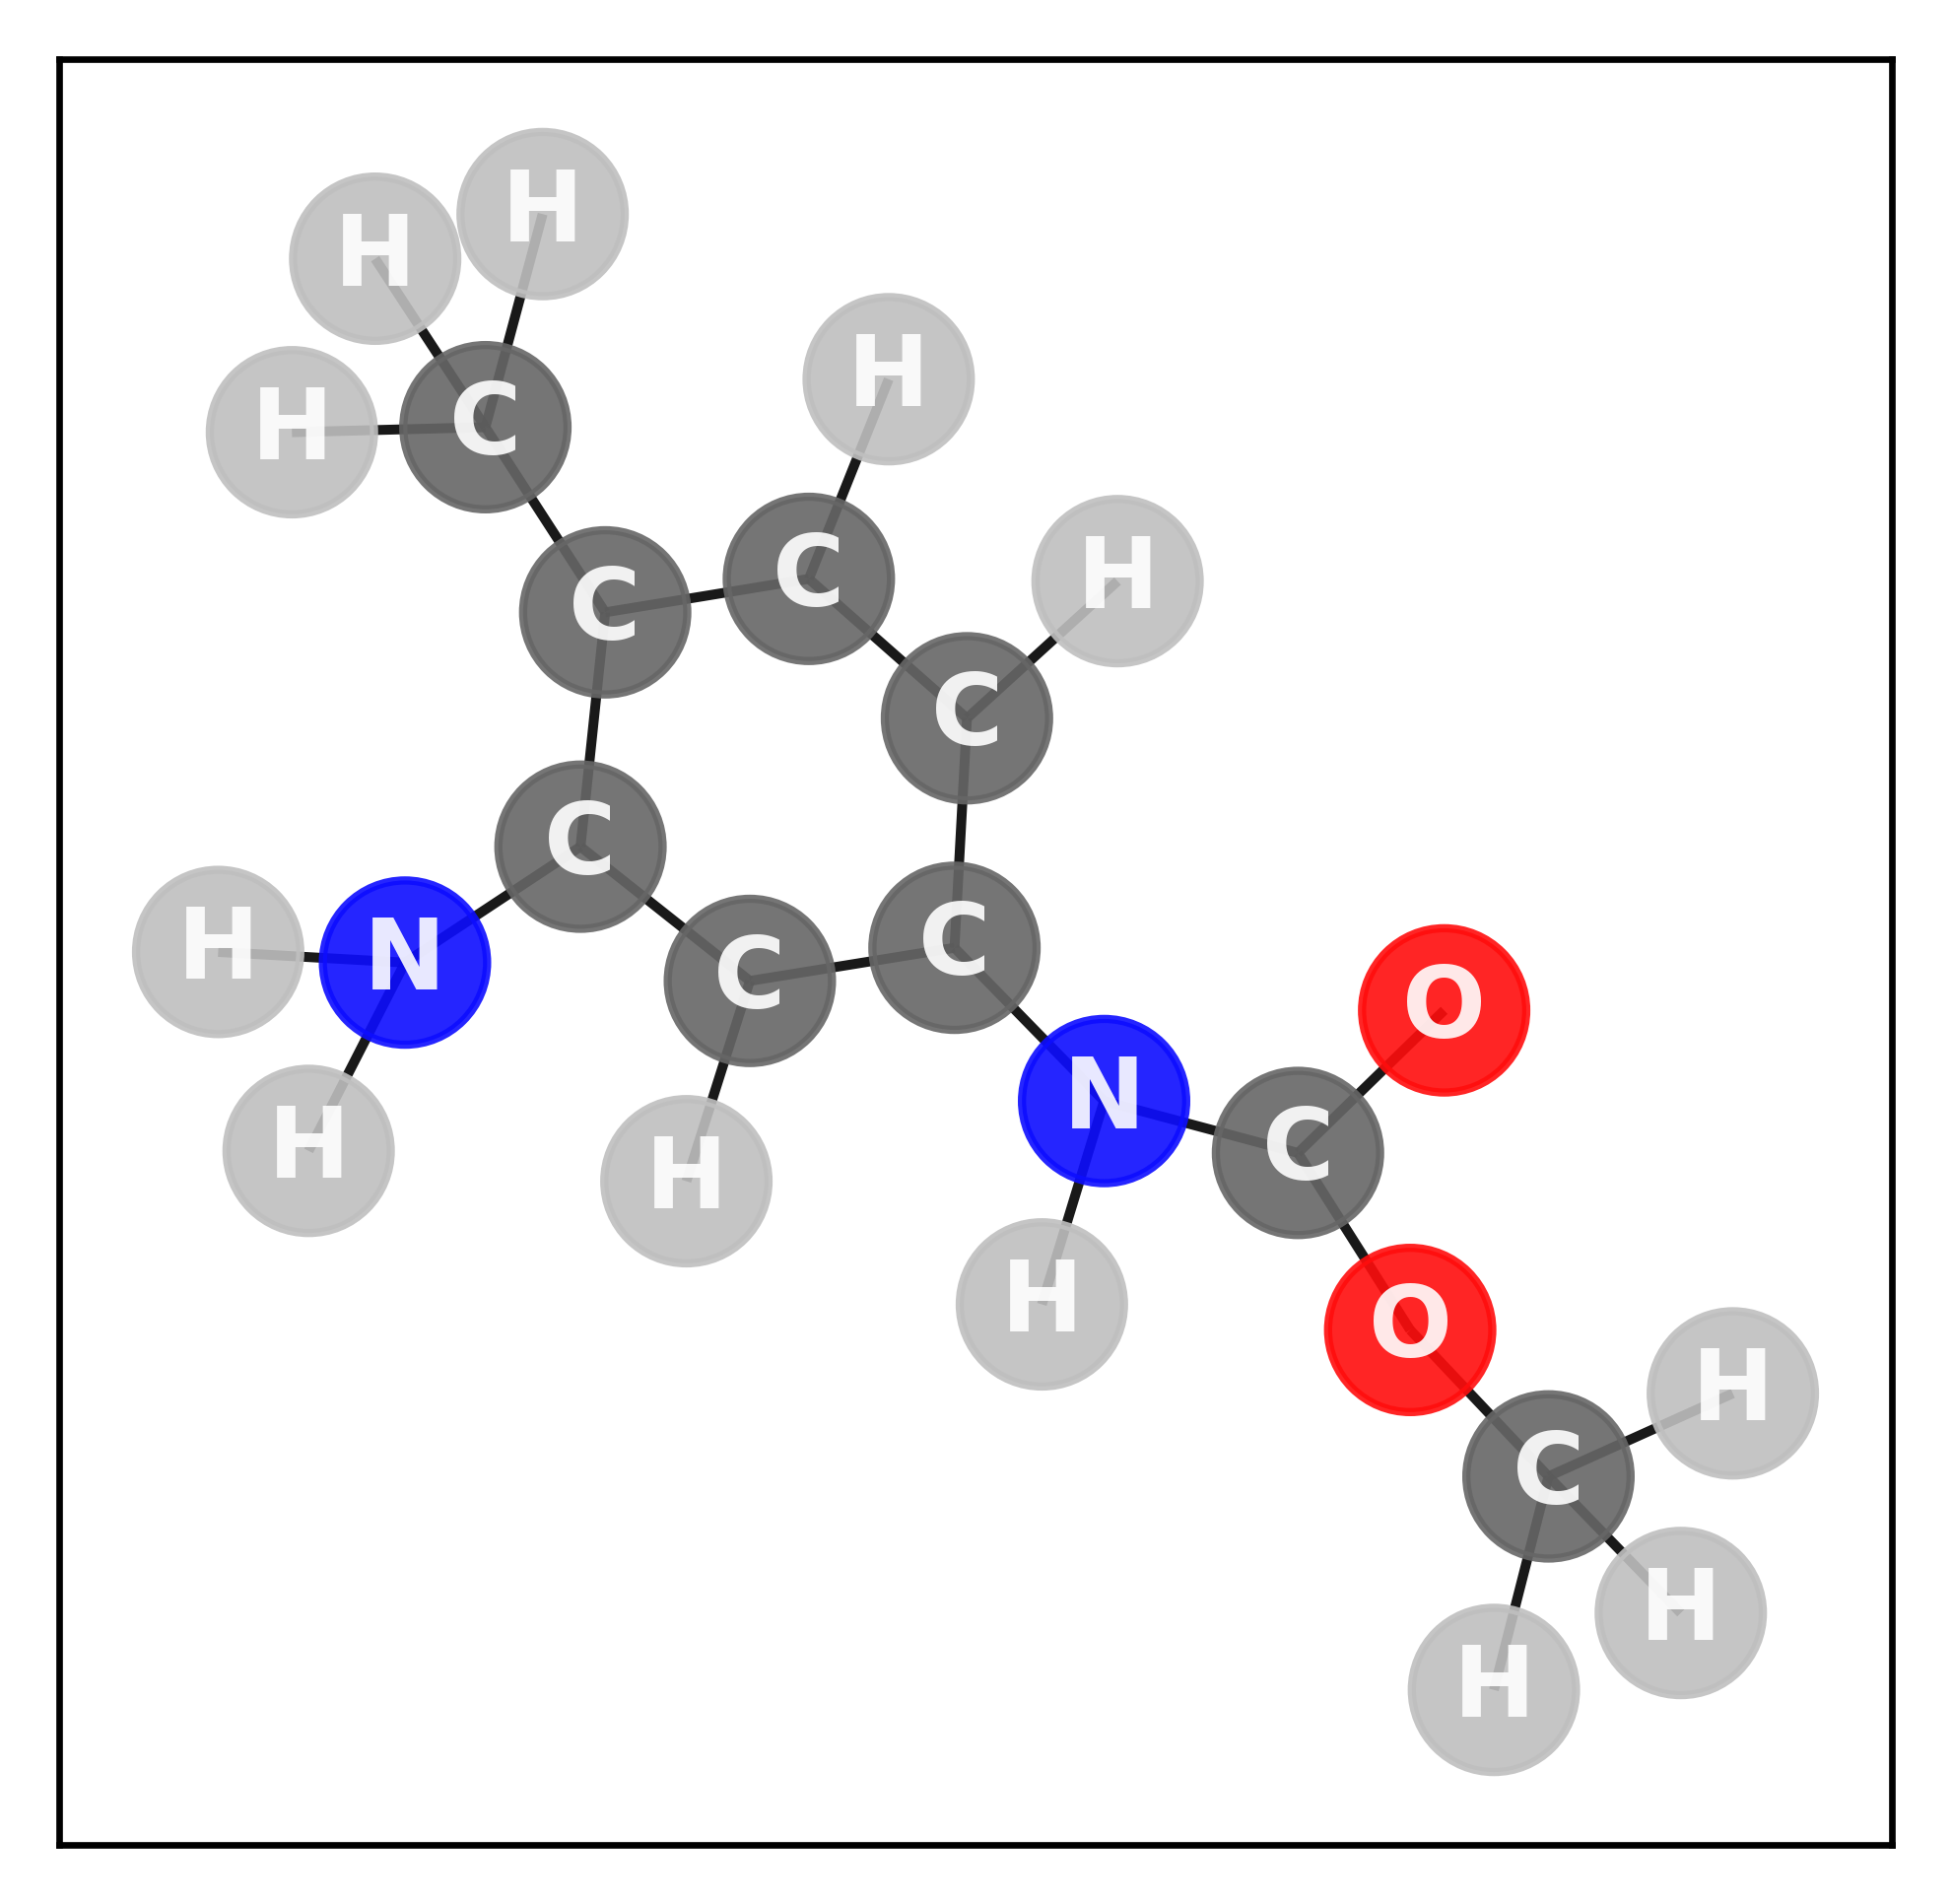

System: mol17
GNN energy = -156.95 eV 
VASP energy = -156.61705379 eV
Abs. Error = 0.33 eV
-----------------------------------


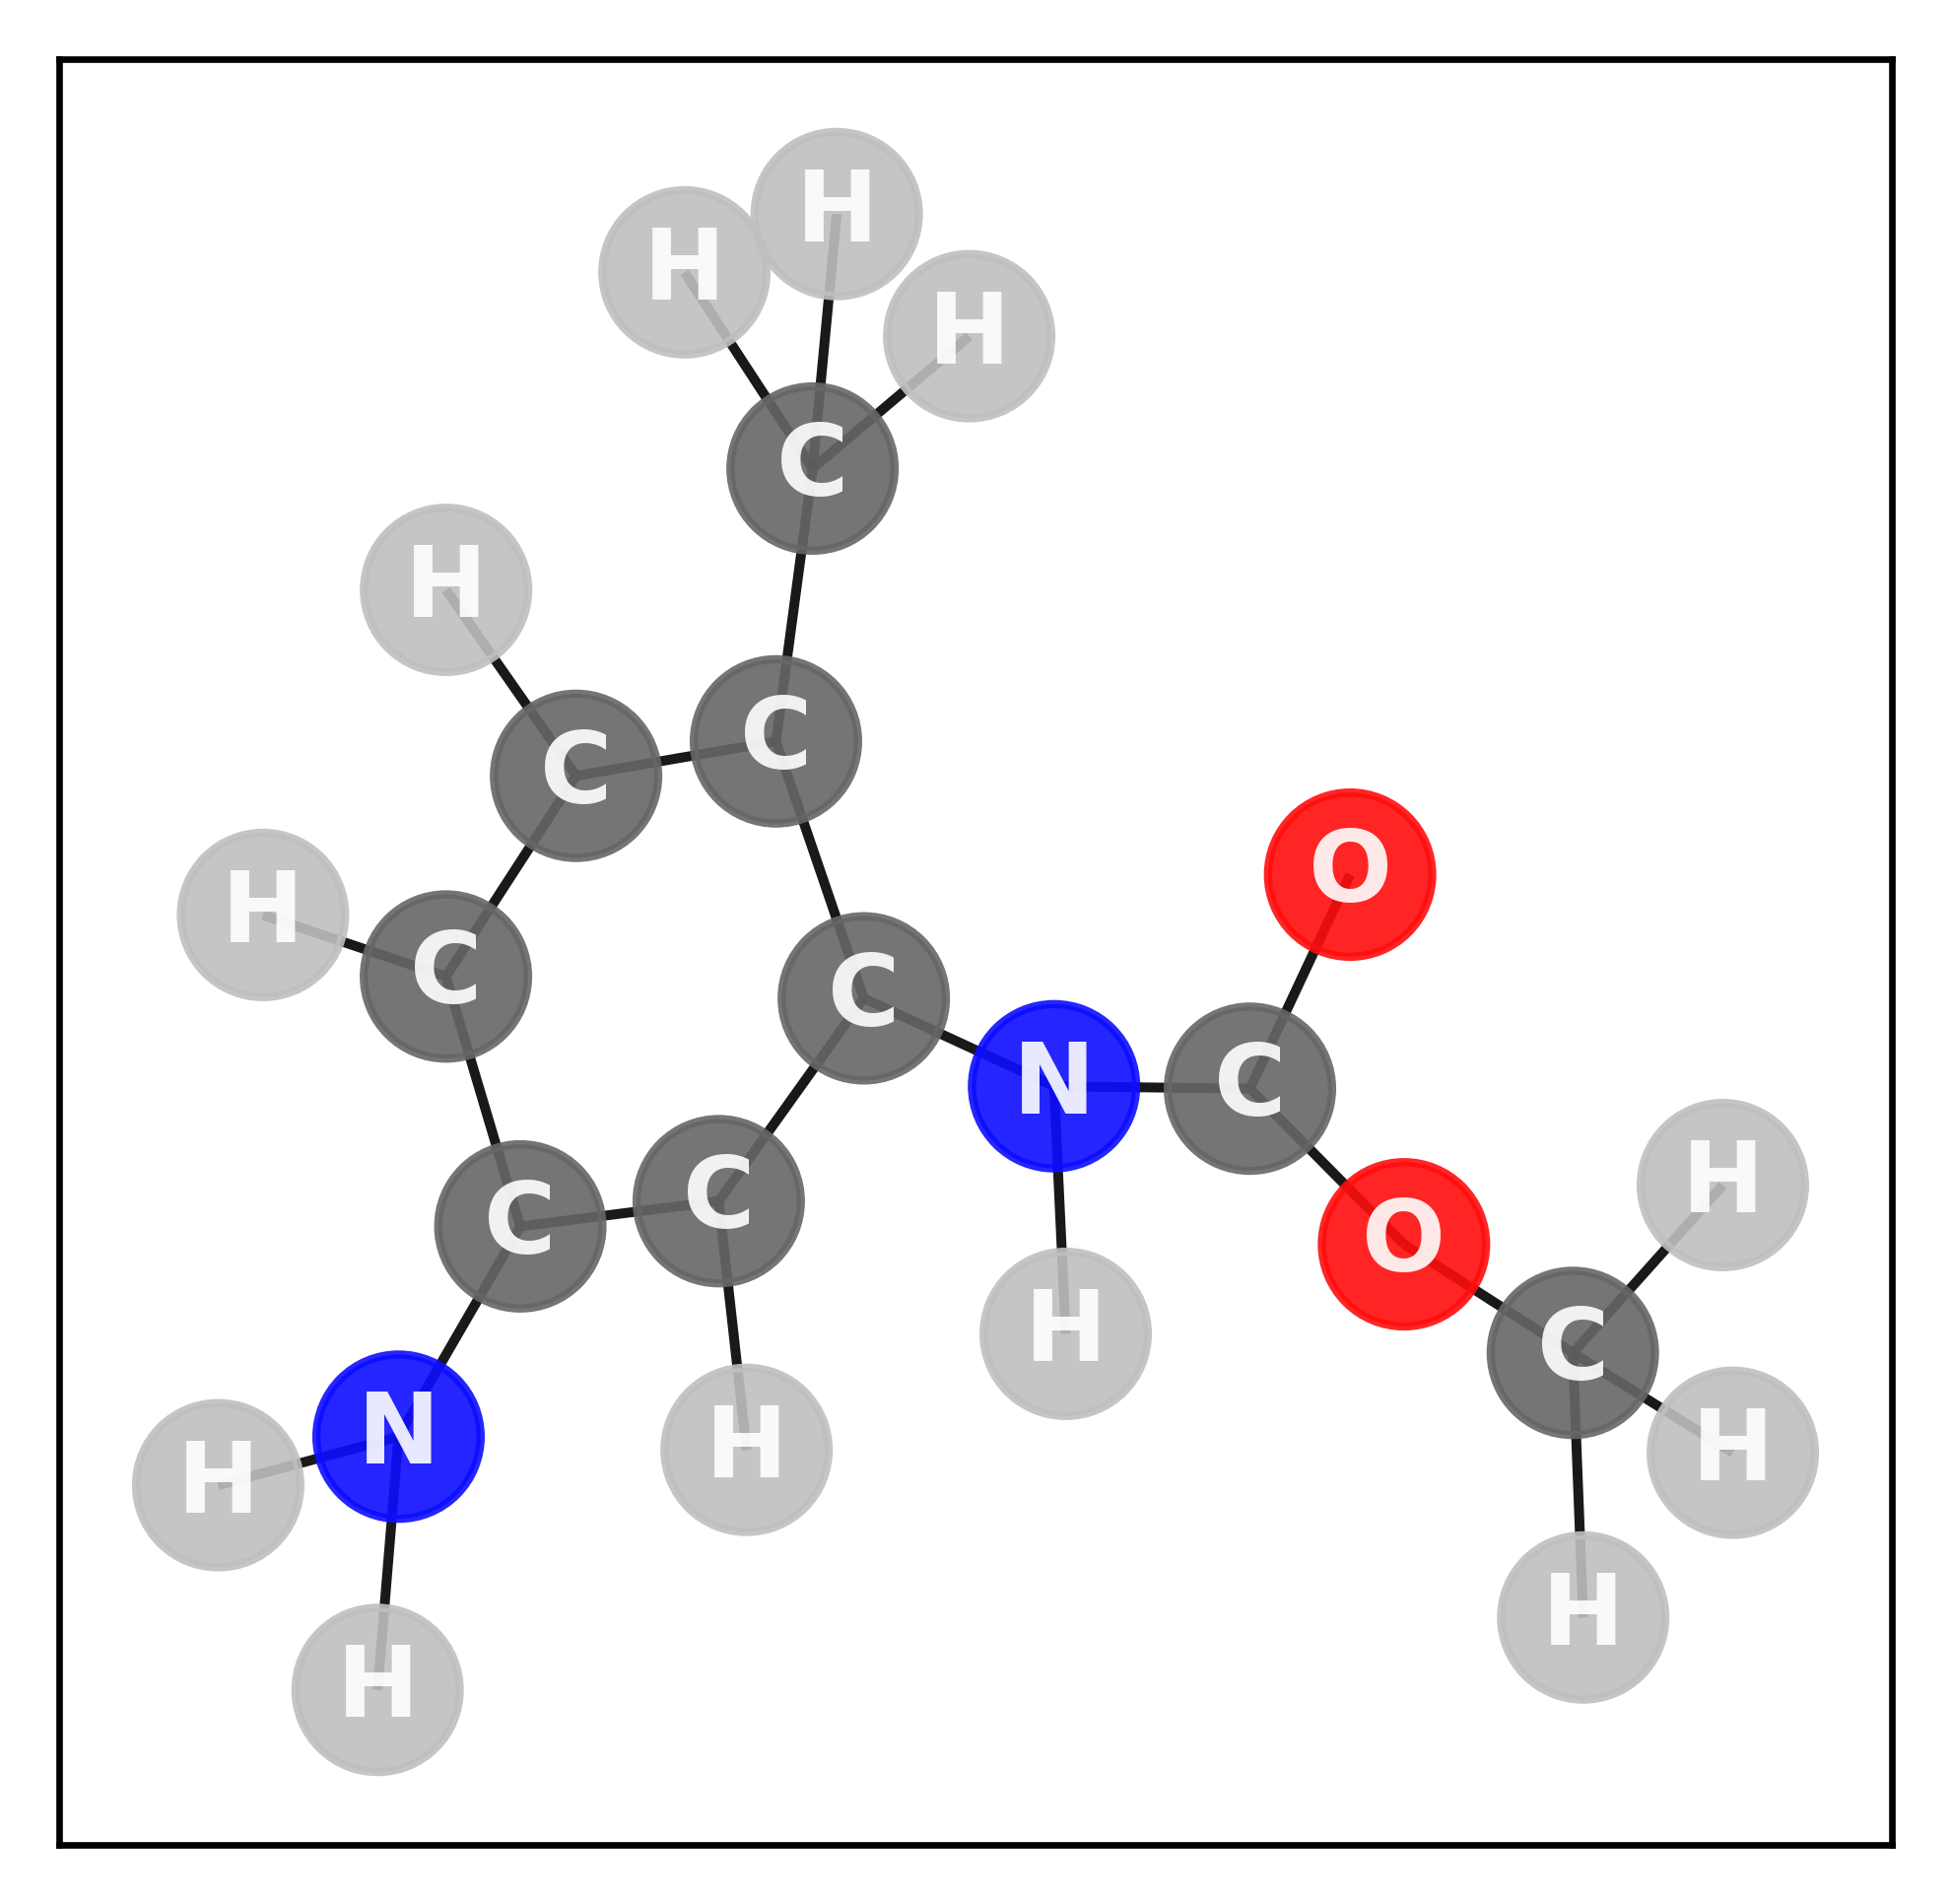

System: mol18
GNN energy = -156.94 eV 
VASP energy = -156.57552837 eV
Abs. Error = 0.36 eV
-----------------------------------


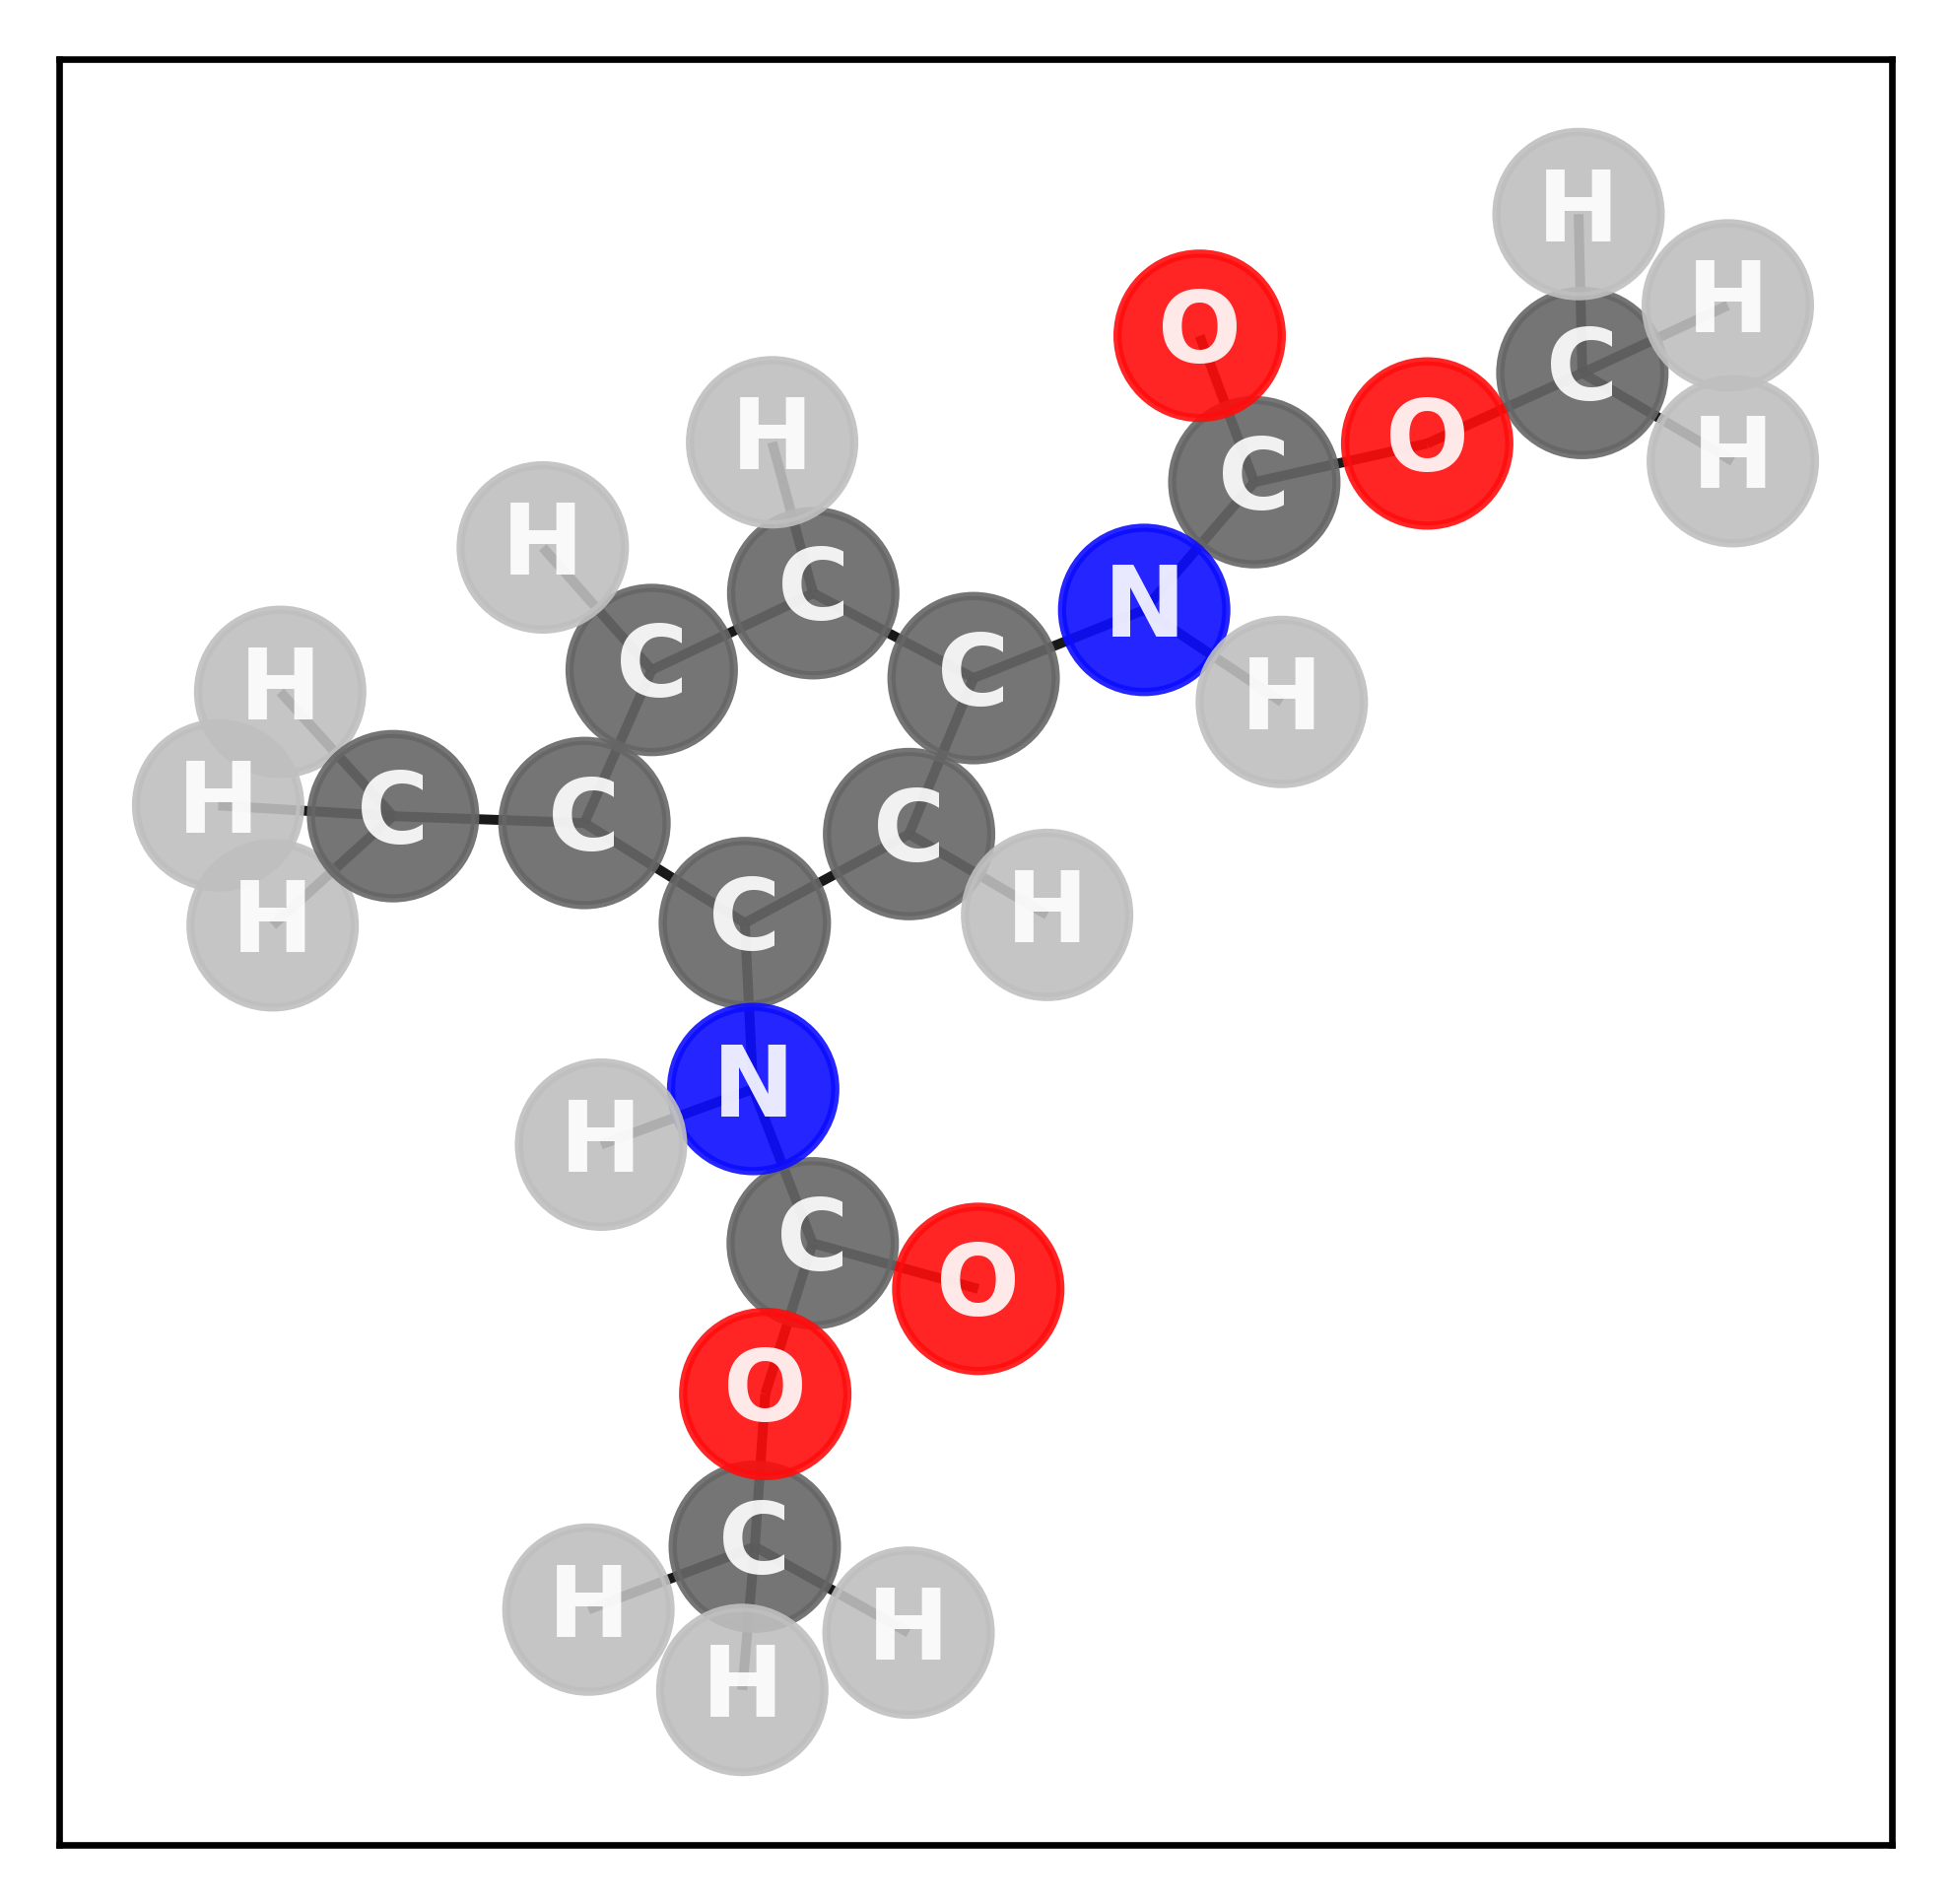

System: mol19
GNN energy = -195.86 eV 
VASP energy = -195.85739787 eV
Abs. Error = 0.00 eV
-----------------------------------


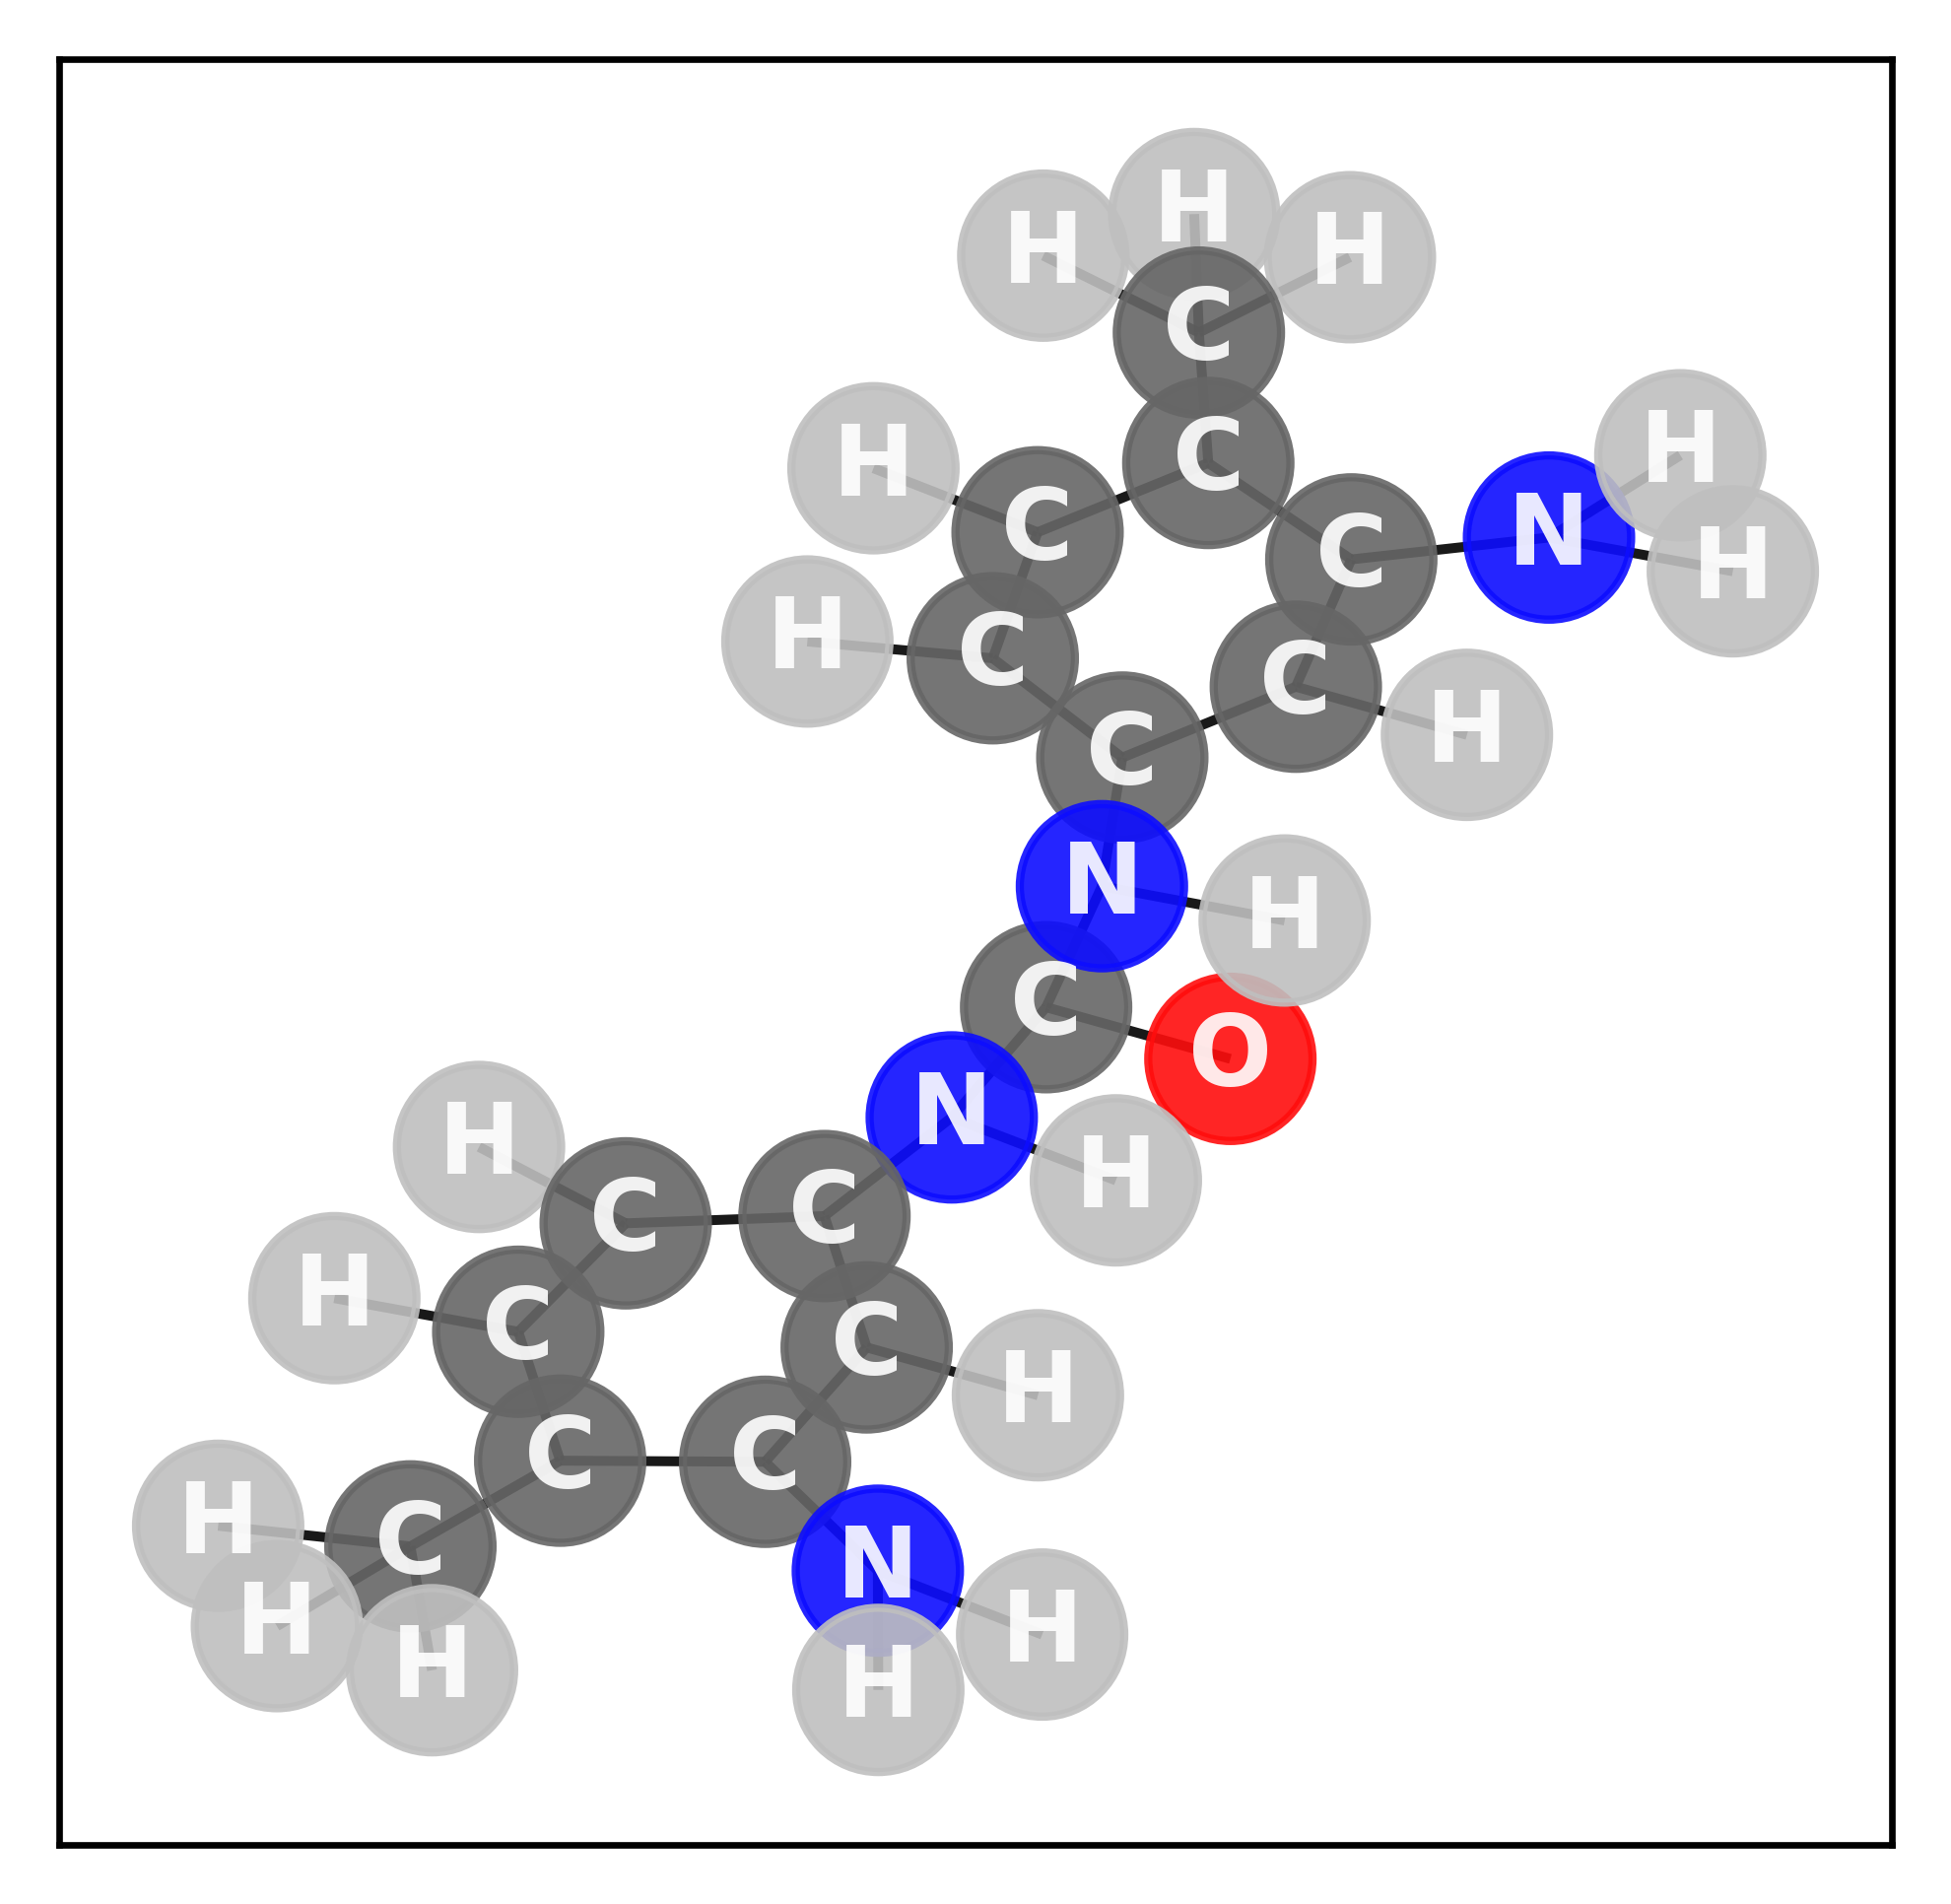

System: mol41
GNN energy = -243.45 eV 
VASP energy = -243.47832296 eV
Abs. Error = 0.03 eV
----------POLYURETHANES-----------
MAE = 0.35 eV = 8.15 kcal/mol
MAE/atom = 0.01 eV/atom = 0.30 kcal/mol
----------------------------------


In [1]:
from pymatgen.io.vasp import Outcar
from pyRDTP.geomio import file_to_mol
from functions import contcar_to_graph
from torch_geometric.loader import DataLoader
from torch_geometric.data import Data
import torch
from graph_tools import plotter
import matplotlib.pyplot as plt
from nets import PreTrainedModel
import numpy as np

MODEL_NAME = "LONG_NIGHT_full"  # PUT HERE THE MODEL NAME
model = PreTrainedModel(MODEL_NAME)

# Test new samples previously optmized with VASP to check BM_dataset performance
au_energy = Outcar("./BM_dataset/Polyurethanes/au-sur/OUTCAR").final_energy * 4
cu_energy = Outcar("./BM_dataset/Polyurethanes/cu-sur/OUTCAR").final_energy
sur = ["au", "cu"] #ag or au
pu = ["mol16", "mol17", "mol18", "mol19", "mol41"]
sur_energy = {"au": au_energy, "cu": cu_energy}
error = np.zeros((len(pu)*(1 + len(sur)), 1))
error_per_atom = np.zeros((len(pu)*(1 + len(sur)), 1))
abs_error = np.zeros((len(pu)*(1 + len(sur)), 1))
counter = 0
for metal in sur: # Adsorption configurations
    for molecule in pu:
        calc = "{}-{}".format(metal, molecule)
        system = "./BM_dataset/Polyurethanes/{}/CONTCAR".format(calc)
        s = Outcar("./BM_dataset/Polyurethanes/{}/OUTCAR".format(calc)).final_energy
        graph = contcar_to_graph(system, model.g_tol, model.g_sf, model.g_metal_2nn)
        gnn_energy = model.evaluate(graph)
        dft_energy = s - sur_energy[metal]
        absolute_error = abs(gnn_energy - dft_energy)
        print("-----------------------------------")
        plotter(graph)
        plt.show()
        print("System: {}-{}".format(metal, molecule))
        print("GNN energy = {:.2f} eV ".format(gnn_energy))
        print("VASP energy = {} eV".format(dft_energy))
        print("Abs. Error = {:.2f} eV".format(absolute_error))
        error[counter] = dft_energy - gnn_energy
        abs_error[counter] = absolute_error
        error_per_atom[counter] = abs_error[counter] / graph.num_nodes
        counter += 1
for molecule in pu:  # gas phase molecules
    system = "./BM_dataset/Polyurethanes/{}/CONTCAR".format(molecule)
    s = Outcar("./BM_dataset/Polyurethanes/{}/OUTCAR".format(molecule)).final_energy
    graph = contcar_to_graph(system, model.g_tol, model.g_sf, model.g_metal_2nn)
    gnn_energy = model.evaluate(graph)
    dft_energy = s
    absolute_error = abs(gnn_energy - dft_energy)   
    print("-----------------------------------")
    plotter(graph)
    plt.show()
    print("System: {}".format(molecule))
    print("GNN energy = {:.2f} eV ".format(gnn_energy))
    print("VASP energy = {} eV".format(dft_energy))
    print("Abs. Error = {:.2f} eV".format(absolute_error))
    error[counter] = dft_energy - gnn_energy
    abs_error[counter] = absolute_error
    error_per_atom[counter] = abs_error[counter] / graph.num_nodes
    counter += 1
print("----------POLYURETHANES-----------")
print("MAE = {:.2f} eV = {:.2f} kcal/mol".format(np.mean(abs_error), np.mean(abs_error) * 23))
print("MAE/atom = {:.2f} eV/atom = {:.2f} kcal/mol".format(np.mean(error_per_atom), np.mean(error_per_atom) * 23))
print("----------------------------------")

In [2]:
print(error)

[[ 2.47014148e-01]
 [ 7.67268102e-01]
 [ 1.89963471e-01]
 [-3.86018049e-01]
 [-2.73405087e-01]
 [-1.15906449e+00]
 [ 5.45313125e-02]
 [-2.62260678e-01]
 [-3.39841072e-01]
 [-2.76024158e-01]
 [ 6.28544042e-01]
 [ 3.31421085e-01]
 [ 3.64559613e-01]
 [ 3.87181182e-04]
 [-3.30889150e-02]]


In [2]:
0.35*15

5.25

In [3]:
5.25 + 11.85 + 9.6

26.700000000000003

In [4]:
26.7/45

0.5933333333333333

In [5]:
5.25/15

0.35